# Enhancing Portfolio Diversity and Prediction Accuracy in the S&P 500 using K-Means Clustering and Long Short-Term Memory Forecasting

### Student Assignment: Predictive Analytics with Time Series and Clustering

Santos, Alwin Denz S. | DS168 - Predictive Analytics | 07 February 2024

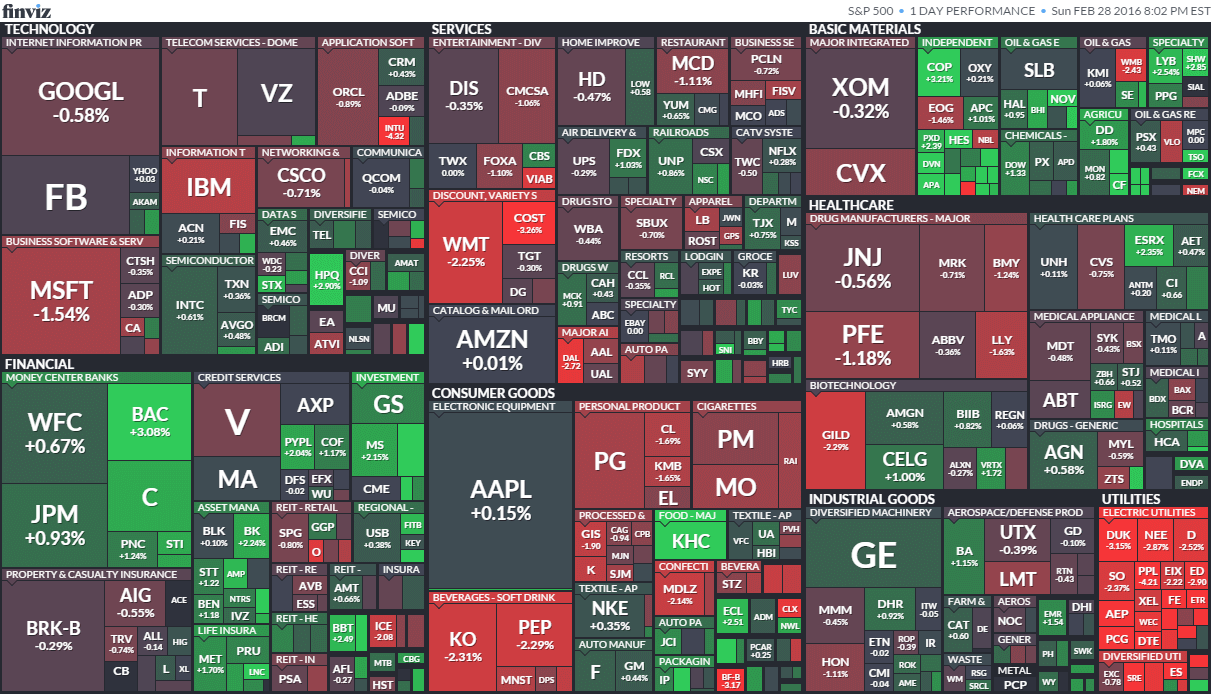

Brian, M. (2021). What is the S&P 500? Full explanation and tutorials. Mergers & Inquisitions. https://mergersandinquisitions.com/what-is-the-sp-500/

***

<div style="text-align: justify"> <b>Objective</b>: This assignment aims to apply both time series analysis and clustering methods to real-world data for predictive purposes. You will utilize the IMRAD structure (Introduction, Methodology, Results, Analysis, Discussion) to present your findings in a clear and concise manner. Additionally, your coding skills will be evaluated through a dedicated rubric. </div><br>


<div style="text-align: justify"><b>Data</b>: Choose a publicly available dataset that exhibits time series characteristics (e.g., hourly temperature readings, daily website traffic, monthly sales figures). The dataset should also have features suitable for clustering (e.g., customer demographics, sensor readings, product categories). </div><br>

<b>Tasks:</b>
1. Introduction:
- Briefly introduce the concept of predictive analytics and its relevance to the chosen domain.
- Motivate the use of both time series analysis and clustering methods for your chosen dataset.
- State the specific research question or objective you aim to address through this analysis.

2. Methodology:
- Describe the data acquisition process and any pre-processing steps applied (e.g., missing value imputation, scaling).
- Explain the chosen time series analysis method (e.g., ARIMA, SARIMA, LSTM) and its rationale.
- Detail the selected clustering algorithm (e.g., K-means, DBSCAN, Hierarchical) and its configuration parameters.
- Outline the evaluation metrics used to assess the performance of both models (e.g., MAPE, RMSE, Silhouette coefficient).

3. Results:
- Present the key findings from the time series analysis, including model parameters, forecasts, and error metrics.
- Visualize the time series data, model predictions, and clustering results using appropriate charts and graphs.
- Summarize the identified clusters based on their characteristics and relationships to the time series patterns.

4. Analysis:
- Interpret the results from both models in the context of the chosen research question.
- Discuss the strengths and limitations of the chosen time series and clustering methods.
- Explain how the time series analysis and clustering findings complement each other for predictive purposes.

5. Discussion:
- Draw conclusions based on the overall analysis, highlighting the key insights gained from the project.
- Discuss the potential applications and implications of your findings in the chosen domain.
- Suggest future research directions or improvements to the implemented methods.

***

## Introduction

<div style="text-align: justify"> The stock market stands as a pivotal component of the global financial system, functioning not only as a measurement for the economic health of nations but also as source of capital information and wealth generation. The impact of the stock market on the economy cannot be overstated. It serves as a critical mechanism for allocating resources efficiently, enabling companies to access the capital necessary for expansion and innovation. Moreover, the stock market provides individuals and institutions with the opportunity to share in the growth of the economy through investment in publicly traded companies. However, navigating the complexities of the stock market requires a deep understanding of its mechanisms and the factors influencing securities’ performance. In this context, advanced analytical techniques such as clustering and time series forecasting offer invaluable tools for investors seeking to identify stable and high-performing securities. By leveraging these methodologies, investors can gain deeper insights into market dynamics, enhancing their ability to construct well-informed, diversified portfolios that align with their investment goals and risk tolerance. </div>


## Data Collection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates as mdates

import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import cdist
from scipy.stats import linregress

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

from bs4 import BeautifulSoup  
import lxml

from datetime import datetime


import warnings
warnings.filterwarnings('ignore')

<div style="text-align: justify"> The dataset used consists of financial data for the S&P500 index, sourced from Yahoo Finance. This data was retrieved by utilizing <code>yfinance</code> module, a Python library designed to download historical market data from Yahoo Finance. The S&P500, or Standard & Poor’s 500, is a stock market index that measures the stock performance of 500 of the largest companies listed on stock exchanges in the United States. The dataset includes historical stock prices and trading volumes for these companies, spanning from January 1, 2020, to present day. </div> 

<div style="text-align: justify"> In order to accurately retrieve historical market data for each company within the S&P 500 index, Wikipedia’s list will be utilized as the foundational dataset. This list regularly updated the composition and ticker symbols for all 500 companies. After retrieving from the Yahoo Finance, the resulting dataset are of this format: </div>

In [2]:
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_table = pd.read_html(sp500_url)
sp500_df = sp500_table[0]  

ticker_symbols = sp500_df['Symbol'].tolist()

In [3]:
stock_data_frames = []

for ticker in ticker_symbols:
    ticker = ticker.replace('.', '-')  
    stock_df = yf.download(ticker, start='2020-01-01')
    stock_df['Ticker'] = ticker  
    stock_data_frames.append(stock_df)

all_stocks_df = pd.concat(stock_data_frames)

all_stocks_df.reset_index(inplace=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

These variables represent key financial metrics and identifiers for each stock.

1. Date: This indicates specific day on which the data was recorded. It is important to note that these dates represent only business days, as the stock market is closed on weekends and public holidays. Formatted as YYYY-MM-DD.
2. Open: The opening price is the value at which a stock first trades upon the opening of an exchange on a given trading day.
3. High: This is the highest price at which a stock traded during the day.
4. Low: The lowest price of the stock during the day.
5. Close: The closing price at the end of the day.
6. Adj Close: The adjusted closing price caused by corporate actions.
7. Volume: This represents the total number of shares of the stock that were traded during the day.
8. Ticker: Unique series of letters assigned to a security for trading. 


In [4]:
all_stocks_df

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2020-01-02,177.679993,180.009995,177.139999,180.000000,152.158859,3601700,MMM
1,2020-01-03,177.020004,178.660004,175.630005,178.449997,150.848602,2466900,MMM
2,2020-01-06,177.149994,178.710007,176.350006,178.619995,150.992294,1998000,MMM
3,2020-01-07,178.279999,178.509995,176.820007,177.899994,150.383652,2173000,MMM
4,2020-01-08,178.000000,181.500000,177.649994,180.630005,152.691406,2758300,MMM
...,...,...,...,...,...,...,...,...
516707,2024-02-05,188.440002,190.869995,187.440002,190.169998,190.169998,2112500,ZTS
516708,2024-02-06,192.000000,196.509995,190.869995,196.139999,196.139999,2459300,ZTS
516709,2024-02-07,196.139999,197.940002,195.210007,197.089996,197.089996,2017800,ZTS
516710,2024-02-08,196.080002,197.000000,195.000000,195.750000,195.750000,1520900,ZTS


In [5]:
csv_file_name = 'sp500_stock_data.csv'
all_stocks_df.to_csv(csv_file_name, index=False)

In [6]:
df = pd.read_csv(csv_file_name)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2020-01-02,177.679993,180.009995,177.139999,180.000000,152.158859,3601700,MMM
1,2020-01-03,177.020004,178.660004,175.630005,178.449997,150.848602,2466900,MMM
2,2020-01-06,177.149994,178.710007,176.350006,178.619995,150.992294,1998000,MMM
3,2020-01-07,178.279999,178.509995,176.820007,177.899994,150.383652,2173000,MMM
4,2020-01-08,178.000000,181.500000,177.649994,180.630005,152.691406,2758300,MMM


## Data Preprocessing

After collecting the dataset, a series of data preprocessing steps were applied to ensure the data’s quality and usability for analysis that is more suitable for identifying trends and insights relevant to stock market stability and performance. First is ensuring the dataset is free from null entries as missing values can introduce bias and inaccuracies. Next, is converting data into appropriate formats, especially datetime, for efficient processing.

In [7]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Ticker       0
dtype: int64

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,516712.000000,516712.000000,516712.000000,516712.000000,516712.000000,5.167120e+05
mean,164.848741,166.938846,162.743623,164.877244,160.981195,5.339024e+06
std,290.380836,294.062013,286.867116,290.529861,290.189024,1.306887e+07
min,3.220000,3.290000,3.020000,3.120000,2.971902,0.000000e+00
25%,55.700001,56.430000,54.930000,55.669998,52.487137,9.667000e+05
50%,101.540001,102.930000,100.190002,101.589996,97.589996,2.031850e+06
75%,191.160004,193.570007,188.779999,191.259995,185.530029,4.659900e+06
max,7470.049805,7497.990234,7398.950195,7486.689941,7486.689941,9.140820e+08


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516712 entries, 0 to 516711
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       516712 non-null  object 
 1   Open       516712 non-null  float64
 2   High       516712 non-null  float64
 3   Low        516712 non-null  float64
 4   Close      516712 non-null  float64
 5   Adj Close  516712 non-null  float64
 6   Volume     516712 non-null  int64  
 7   Ticker     516712 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 31.5+ MB


<div style="text-align: justify"> To enhance the dataset further, new set of features were created such as the average volume for each security, standard deviation of close, trend slope, average volatility, and current price. The average volume represents the interest in the stock or market activity. A high trading volume can indicate strong interest, while low volumes suggest lesser engagement. The standard deviation of closing price indicates variability. For investors focused on stability, stocks with lower standard deviations are preferred. The trend slope is calculated using linear regression on historical prices, this indicates the general direction a stock is moving over time. Average volatility provides the rate a stock’s price increases or decreases. Lastly, the current price provides the current market valuation. These engineered features are vital for investors seeking securities that are stable and good performing. </div>

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Volatility'] = ((df['High'] - df['Low']) / df['Open']) * 100
df['Price Change'] = ((df['Close'] - df['Open']) / df['Open']) * 100

grouped = df.groupby('Ticker')

avg_volatility = grouped['Volatility'].mean()

current_price = grouped['Close'].last()

def get_slope(group):
    return linregress(group['Date'].map(datetime.toordinal), group['Adj Close'])[0]

trend_slope = grouped.apply(get_slope)

features_df = pd.DataFrame({
    'Avg Volume': grouped['Volume'].mean(),
    'Std Dev Close': grouped['Close'].std(),
    'Trend Slope': trend_slope,
    'Avg Volatility': avg_volatility,
    'Current Price': current_price
}).reset_index()

features_df


,Ticker,Avg Volume,Std Dev Close,Trend Slope,Avg Volatility,Current Price
0,A,1.746861e+06,23.687277,0.027446,2.328533,133.360001
1,AAL,4.244648e+07,4.066989,-0.002677,4.605487,14.880000
2,AAPL,9.782513e+07,33.739785,0.069675,2.340421,188.850006
3,ABBV,7.024000e+06,26.266527,0.063041,2.050265,174.029999
4,ABNB,6.473575e+06,28.413465,-0.049937,4.275611,147.595001
...,...,...,...,...,...,...
498,YUM,1.768730e+06,15.920627,0.033175,1.948466,130.279999
499,ZBH,1.455805e+06,17.115834,-0.010740,2.426277,122.809998
500,ZBRA,3.849310e+05,117.626398,-0.049337,2.993222,253.089996
501,ZION,2.336311e+06,12.625446,0.002571,3.691719,40.090000


In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['Volatility'] = ((df['High'] - df['Low']) / df['Open']) * 100
df['Next Day Open'] = df.groupby('Ticker')['Open'].shift(-1)
df['Price Change'] = ((df['Next Day Open'] - df['Close']) / df['Close']) * 100

grouped = df.groupby('Ticker')
avg_volume = grouped['Volume'].mean()

std_dev_close = grouped['Close'].std()

def get_slope(group):
    ordinal_dates = group['Date'].map(datetime.toordinal)
    slope, _, _, _, _ = linregress(ordinal_dates, group['Adj Close'])
    return slope

trend_slope = grouped.apply(get_slope)

# Preparing the final DataFrame
features_df = pd.DataFrame({
    'Avg Volume': avg_volume,
    'Std Dev Close': std_dev_close,
    'Trend Slope': trend_slope,
    'Avg Volatility': grouped['Volatility'].mean(),
    'Current Price': grouped['Close'].last(),
    'Avg Price Change': grouped['Price Change'].mean()  
}).reset_index()

features_df

,Ticker,Avg Volume,Std Dev Close,Trend Slope,Avg Volatility,Current Price,Avg Price Change
0,A,1.746861e+06,23.687277,0.027446,2.328533,133.360001,0.042484
1,AAL,4.244648e+07,4.066989,-0.002677,4.605487,14.880000,0.215244
2,AAPL,9.782513e+07,33.739785,0.069675,2.340421,188.850006,-0.008381
3,ABBV,7.024000e+06,26.266527,0.063041,2.050265,174.029999,0.006608
4,ABNB,6.473575e+06,28.413465,-0.049937,4.275611,147.595001,-0.072096
...,...,...,...,...,...,...,...
498,YUM,1.768730e+06,15.920627,0.033175,1.948466,130.279999,0.031143
499,ZBH,1.455805e+06,17.115834,-0.010740,2.426277,122.809998,0.027150
500,ZBRA,3.849310e+05,117.626398,-0.049337,2.993222,253.089996,-0.006420
501,ZION,2.336311e+06,12.625446,0.002571,3.691719,40.090000,0.020315


## Exploratory Data Analysis

In [12]:
features_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg Volume,503.0,5.357480e+06,1.101717e+07,23081.263056,1.182854e+06,2.246535e+06,4.943679e+06,1.325916e+08
Std Dev Close,503.0,3.582681e+01,6.480764e+01,1.207465,1.043359e+01,2.063042e+01,3.845667e+01,9.822094e+02
Trend Slope,503.0,4.381012e-02,1.275689e-01,-0.189148,3.197831e-03,1.931504e-02,5.180003e-02,1.797401e+00
Avg Volatility,503.0,2.722518e+00,7.071590e-01,1.587335,2.237829e+00,2.556535e+00,3.007902e+00,6.082978e+00
Current Price,503.0,2.078700e+02,4.359891e+02,9.095000,5.850000e+01,1.161400e+02,2.224500e+02,7.433010e+03
Avg Price Change,503.0,3.430453e-02,4.436036e-02,-0.324747,9.962551e-03,3.129296e-02,5.452584e-02,2.305148e-01


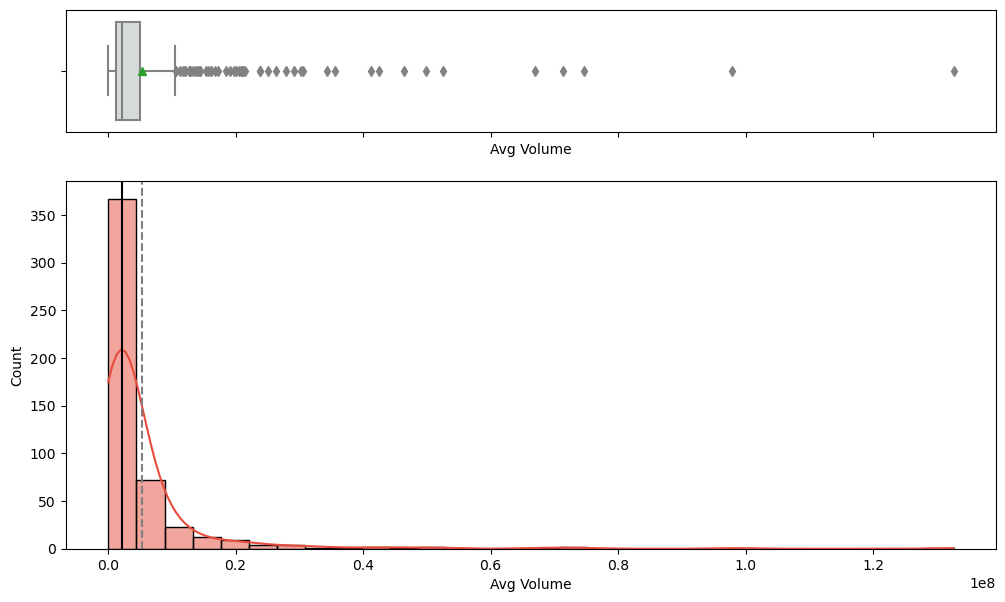

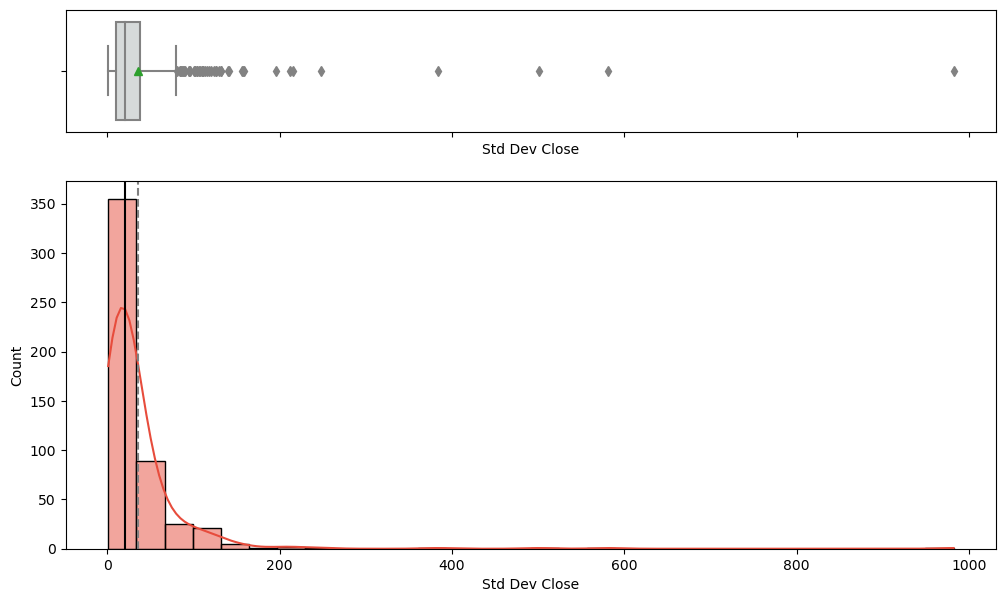

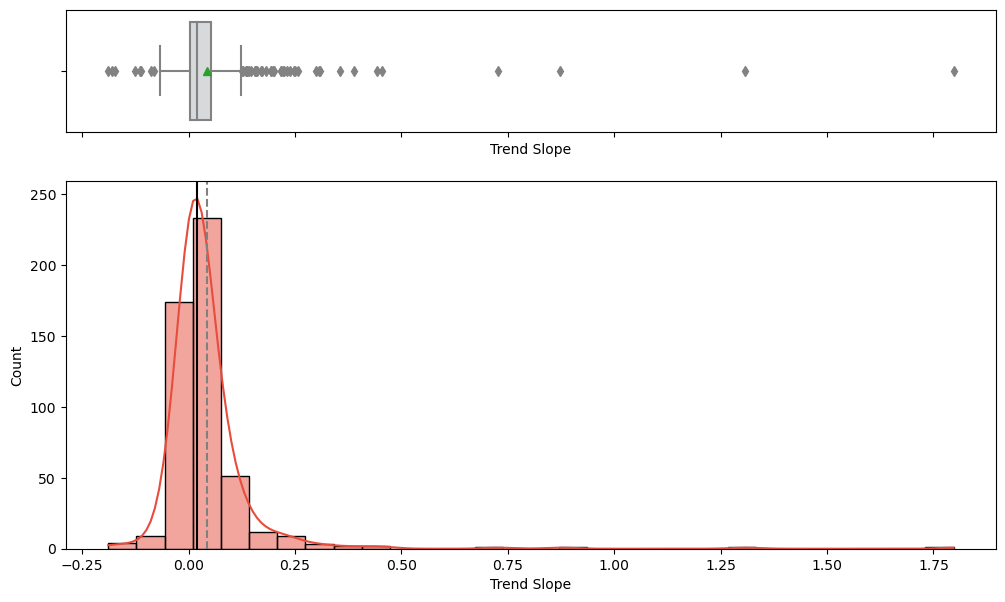

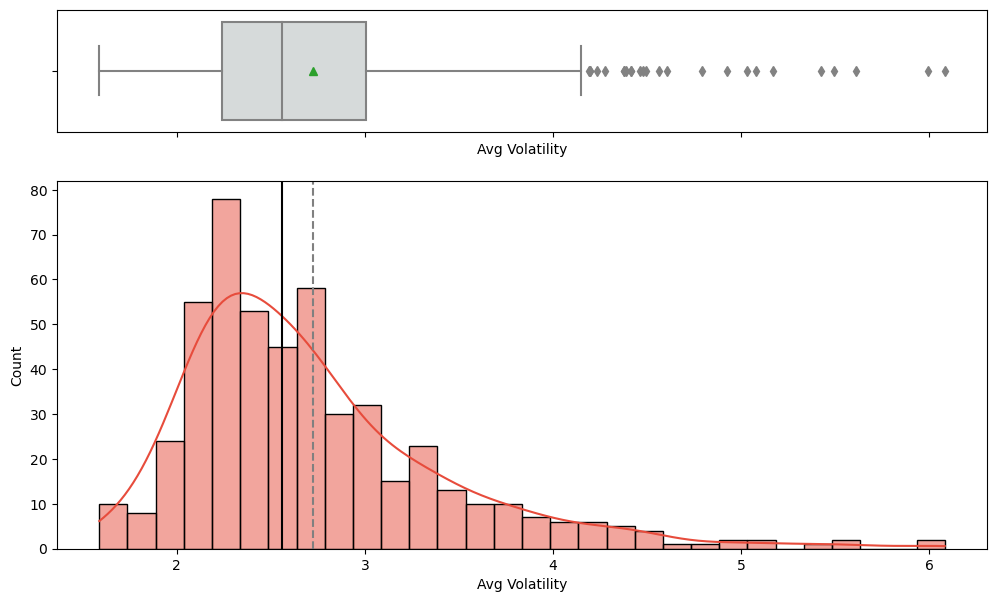

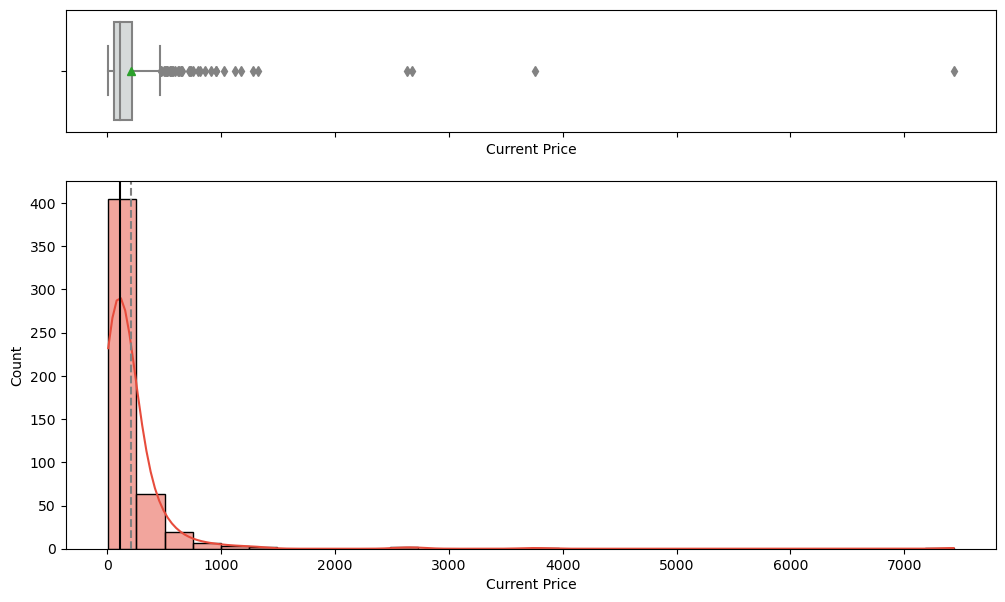

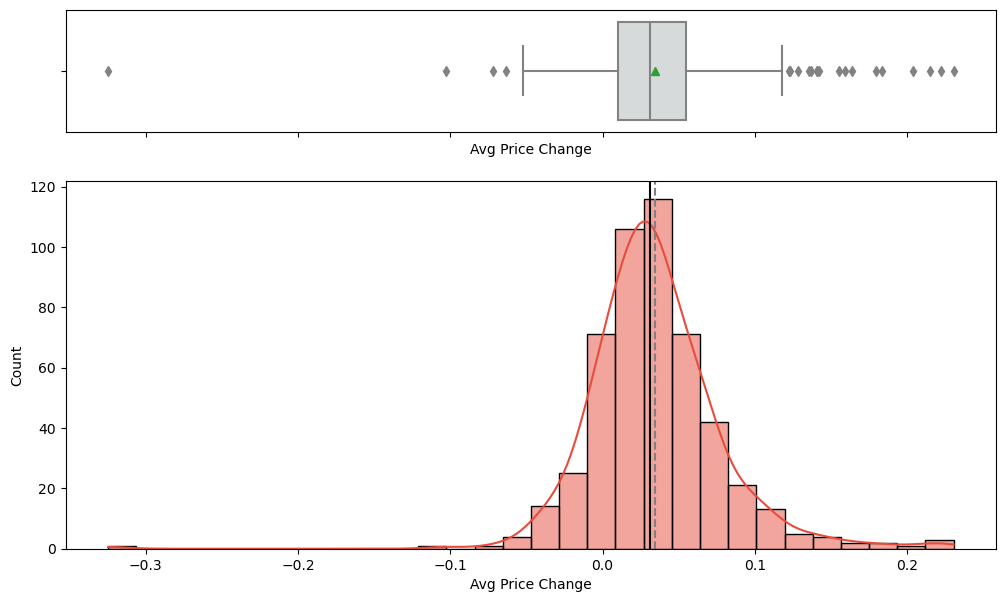

In [13]:
def histo_bp(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.25, 0.75)}, figsize=figsize)
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="#D5DBDB")
    
    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="#E74C3C")
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="#E74C3C")
    
    ax_hist2.axvline(data[feature].mean(), color="gray", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")
    
    plt.show()

num_col = features_df.select_dtypes(include=np.number).columns.tolist()
for col in num_col:
    histo_bp(features_df, col, kde=True, bins=30)  # Adjust 'kde' and 'bins' as needed

After performing feature engineering, an analysis was conducted to examine the correlation among the newly engineered and existing variables to identify redundancy. This step is vital  especially for clustering by preventing highly correlated features. 

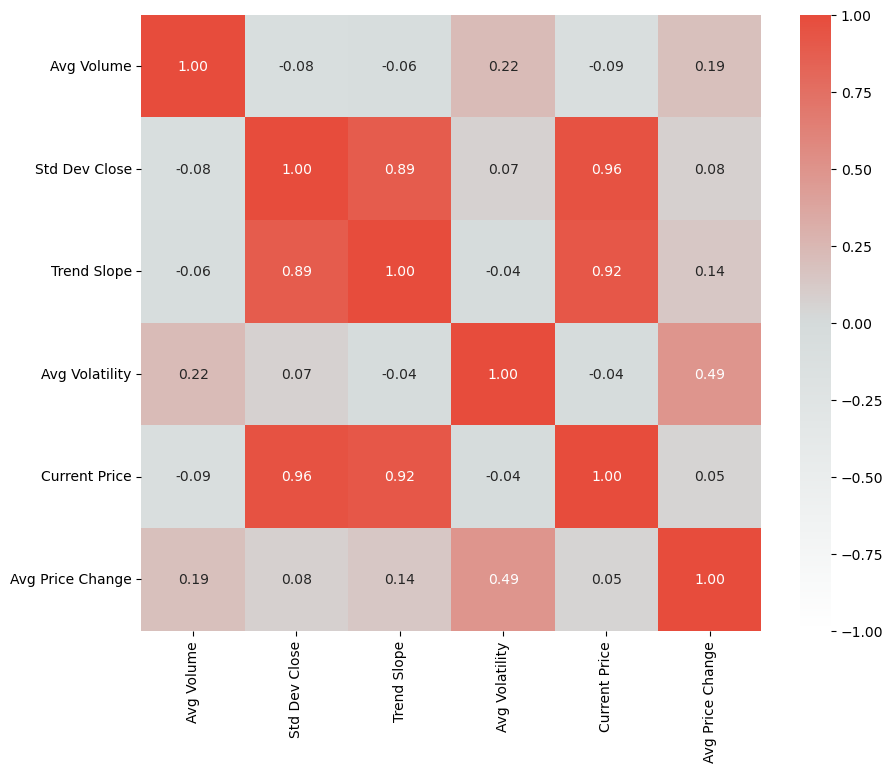

In [14]:
colormap = LinearSegmentedColormap.from_list("custom_cmap", ['#ffffff','#d5dbdb',"#E74C3C"])

plt.figure(figsize=(10, 8))

sns.heatmap(
    features_df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap=colormap
)
plt.show()

In [15]:
numerical_cols = features_df.columns[1:]  
scaler = StandardScaler()
features_df_scaled = scaler.fit_transform(features_df[numerical_cols])
features_df_scaled = pd.DataFrame(features_df_scaled, columns=numerical_cols)
features_df_scaled['Ticker'] = features_df['Ticker']
cols = ['Ticker'] + [col for col in features_df_scaled.columns if col != 'Ticker']
features_df_scaled = features_df_scaled[cols]

features_df_scaled

,Ticker,Avg Volume,Std Dev Close,Trend Slope,Avg Volatility,Current Price,Avg Price Change
0,A,-0.328053,-0.187503,-0.128405,-0.557692,-0.171069,0.184572
1,AAL,3.369823,-0.490551,-0.364770,2.665375,-0.443089,4.082908
2,AAPL,8.401403,-0.032235,0.202954,-0.540865,-0.043668,-0.963199
3,ABBV,0.151416,-0.147665,0.150897,-0.951585,-0.077694,-0.624980
4,ABNB,0.101406,-0.114504,-0.735608,2.198430,-0.138386,-2.400932
...,...,...,...,...,...,...,...
498,YUM,-0.326066,-0.307464,-0.083447,-1.095684,-0.178140,-0.071350
499,ZBH,-0.354497,-0.289003,-0.428038,-0.419334,-0.195291,-0.161439
500,ZBRA,-0.451795,1.263447,-0.730896,0.383187,0.103821,-0.918953
501,ZION,-0.274497,-0.358360,-0.323595,1.371920,-0.385209,-0.315674


# CLUSTERING

## K-Means Clustering

<div style="text-align: justify"> Securities will be subjected to clustering techniques to determine the similarities among them, focusing on key attributes such as their performance, stability, and other relevant metrics. The objective is to identify groups of securities that exhibit similar characteristics that can provide insights into their market behavior and investment potential. K-Means Clustering will be employed to partition the securities into distinct groups based on selected financial indicators. By applying Elbow method’s result as a predetermined number of clusters, K-Means will iteratively assign securities to the nearest cluster centroid. Hierarchical Clustering, on the other hand, will be used to build a hierarchical cluster without the need to predefine the number of clusters. This dual approach allows to identify distinct groups regardless of the dataset size, the desired shape, and variability of clusters. </div>

Number of Clusters: 1 	Average Distortion: 1.5712928611598136
Number of Clusters: 2 	Average Distortion: 1.493022269572097
Number of Clusters: 3 	Average Distortion: 1.277992706010315
Number of Clusters: 4 	Average Distortion: 1.1776618044206268
Number of Clusters: 5 	Average Distortion: 1.111502301002621
Number of Clusters: 6 	Average Distortion: 1.0282666504826206
Number of Clusters: 7 	Average Distortion: 0.9832821498559472
Number of Clusters: 8 	Average Distortion: 0.9563904692100348


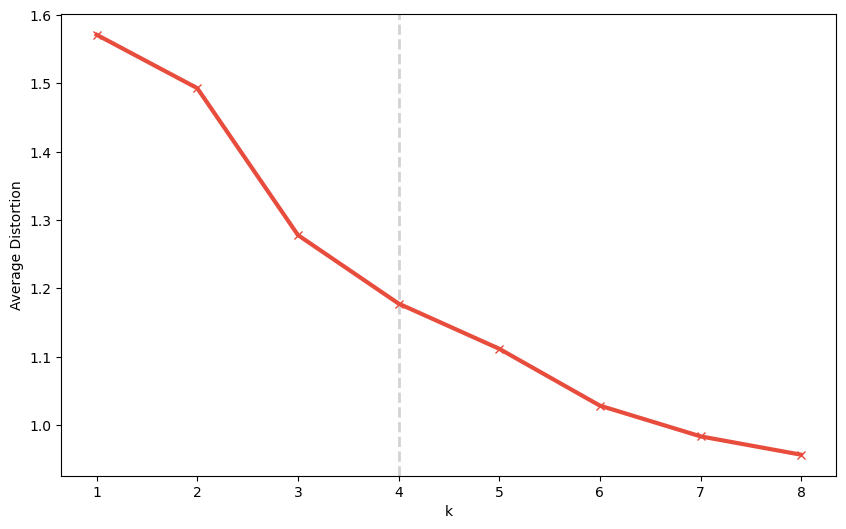

In [16]:
subset_scaled_df = features_df_scaled.drop(['Ticker', 'Current Price'], axis=1)

clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
    meanDistortions.append(distortion)
    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.figure(figsize=(10, 6))
plt.plot(clusters, meanDistortions, 'bx-', color='#E74C3C', linewidth=3, zorder = 2)
plt.axvline(x=4, color='lightgray', linestyle='--', linewidth=2, zorder = 1)  
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.show()

This shows the elbow method used in determining the number of clusters needed. The method involves plotting the number of clusters against a measure of cluster quality. As the number of clusters from 1 to 4 increase, it can be discerned the significant decrease in the average distortion, from 1.5713 to 1.7777.  At 4 clusters, the average distortion stands at 1.1777. This point represents the last significant drop before the decrease in distortion become less pronounced. Lastly, beyond 4 clusters, the average distortion continues to decrease down to 0.9564 at 8 clusters. Figure above shows that based on the elbow method, k = 4 is identified as the optimal number of clusters. 

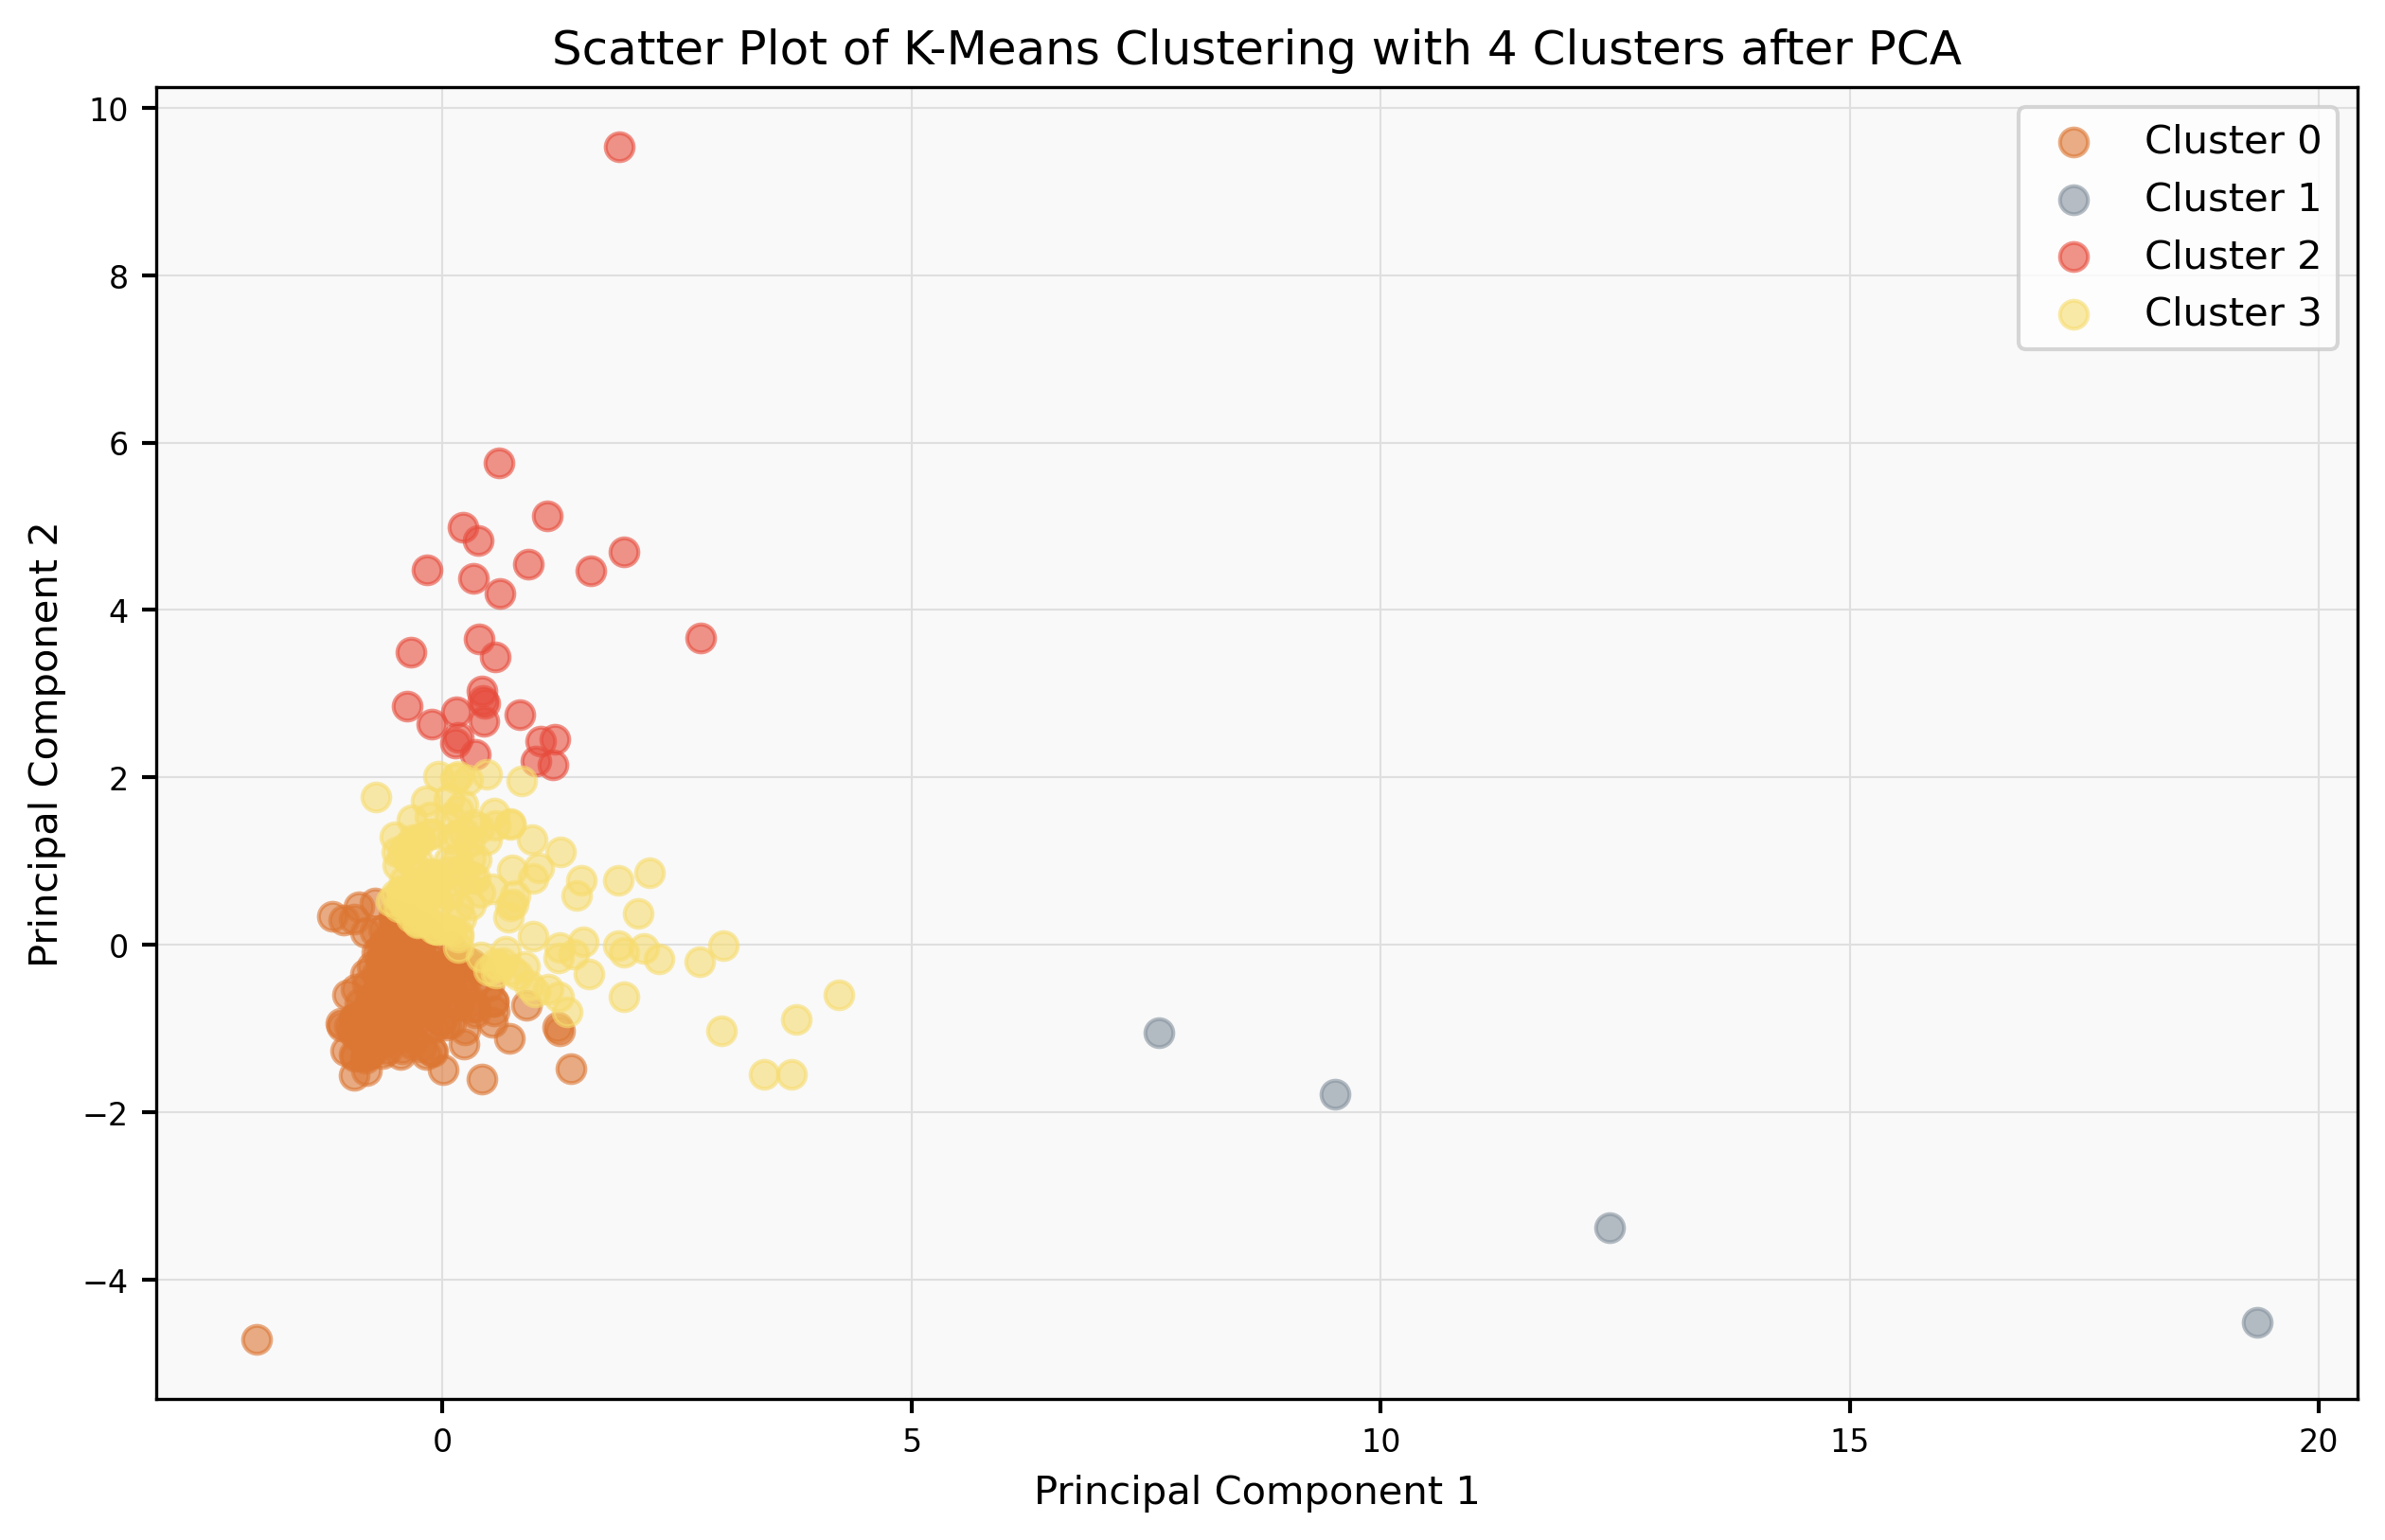

In [17]:

pca = PCA(n_components=2)
pca_result = pca.fit_transform(subset_scaled_df)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(pca_result)

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
colors = ['#DC7633', '#85929E', '#E74C3C', '#F7DC6F']
cluster_names = ['Cluster 0','Cluster 1', 'Cluster 2', 'Cluster 3']

for i in range(4):
    plt.scatter(pca_result[clusters == i, 0], pca_result[clusters == i, 1], 
                s=50, c=colors[i], label=cluster_names[i], alpha=0.6, zorder = 2)
    
ax.set_facecolor('#F9F9F9')
ax.grid(True, color='#DFDFDF', linewidth=0.5, zorder = 1)
ax.tick_params(axis='x', width=1)
ax.tick_params(axis='y', width=1)
ax.tick_params(axis='both', colors='black', labelsize=8)
    
plt.title('Scatter Plot of K-Means Clustering with 4 Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


This illustrates the clustering results of securities analyzed using K-Means clustering. Cluster 0 aligns along PC1 = 0 but vary along PC2 from -2 to 0. The alignment indicates lack of substantial variance in the dimension capture by PC1. Cluster 1 is positioned distinctly away from other securities. Their isolated placement on the plot, particularly along the PC1 axis, indicated unique characteristics not shared with broader dataset. Cluster 2 and 3 performs similar to Cluster 1 in their alignment along PC1 = 0.

In [18]:
features_df_scaled['Cluster'] = clusters
clustered_tickers = features_df_scaled.groupby('Cluster')['Ticker'].apply(list)

for cluster_id, tickers in clustered_tickers.items():
    print(f"Cluster {cluster_id}:")
    print(tickers)
    print("\n")

Cluster 0:
['A', 'ABBV', 'ABNB', 'ABT', 'ACN', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AFL', 'AIZ', 'AJG', 'AKAM', 'ALL', 'ALLE', 'AMCR', 'AME', 'AMGN', 'AMT', 'ANSS', 'AON', 'AOS', 'APD', 'APH', 'ARE', 'ATO', 'AVB', 'AVY', 'AWK', 'BALL', 'BAX', 'BBY', 'BDX', 'BF-B', 'BIIB', 'BIO', 'BK', 'BLK', 'BMY', 'BR', 'BRK-B', 'BRO', 'BSX', 'BWA', 'BX', 'BXP', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CDW', 'CE', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMCSA', 'CME', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COR', 'COST', 'CPB', 'CPRT', 'CPT', 'CRM', 'CSCO', 'CSGP', 'CSX', 'CTSH', 'CTVA', 'CVS', 'D', 'DAY', 'DD', 'DG', 'DGX', 'DHR', 'DIS', 'DLR', 'DLTR', 'DOV', 'DOW', 'DPZ', 'DTE', 'DUK', 'DVA', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'EQIX', 'EQR', 'ES', 'ESS', 'ETR', 'EVRG', 'EW', 'EXC', 'EXPD', 'EXR', 'FAST', 'FDS', 'FDX', 'FE', 'FFIV', 'FI', 'FIS', 'FLT', 'FMC', 'FOX', 'FOXA', 'FTV', 'GD', 'GEHC', 'GEN', 'GILD', 'GIS', 'GL', 'GLW', 'GOOG',

## Hierarchical Clustering

In [19]:
X = features_df.drop('Ticker', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [21]:
hclust = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hclust_labels = hclust.fit_predict(X_pca)

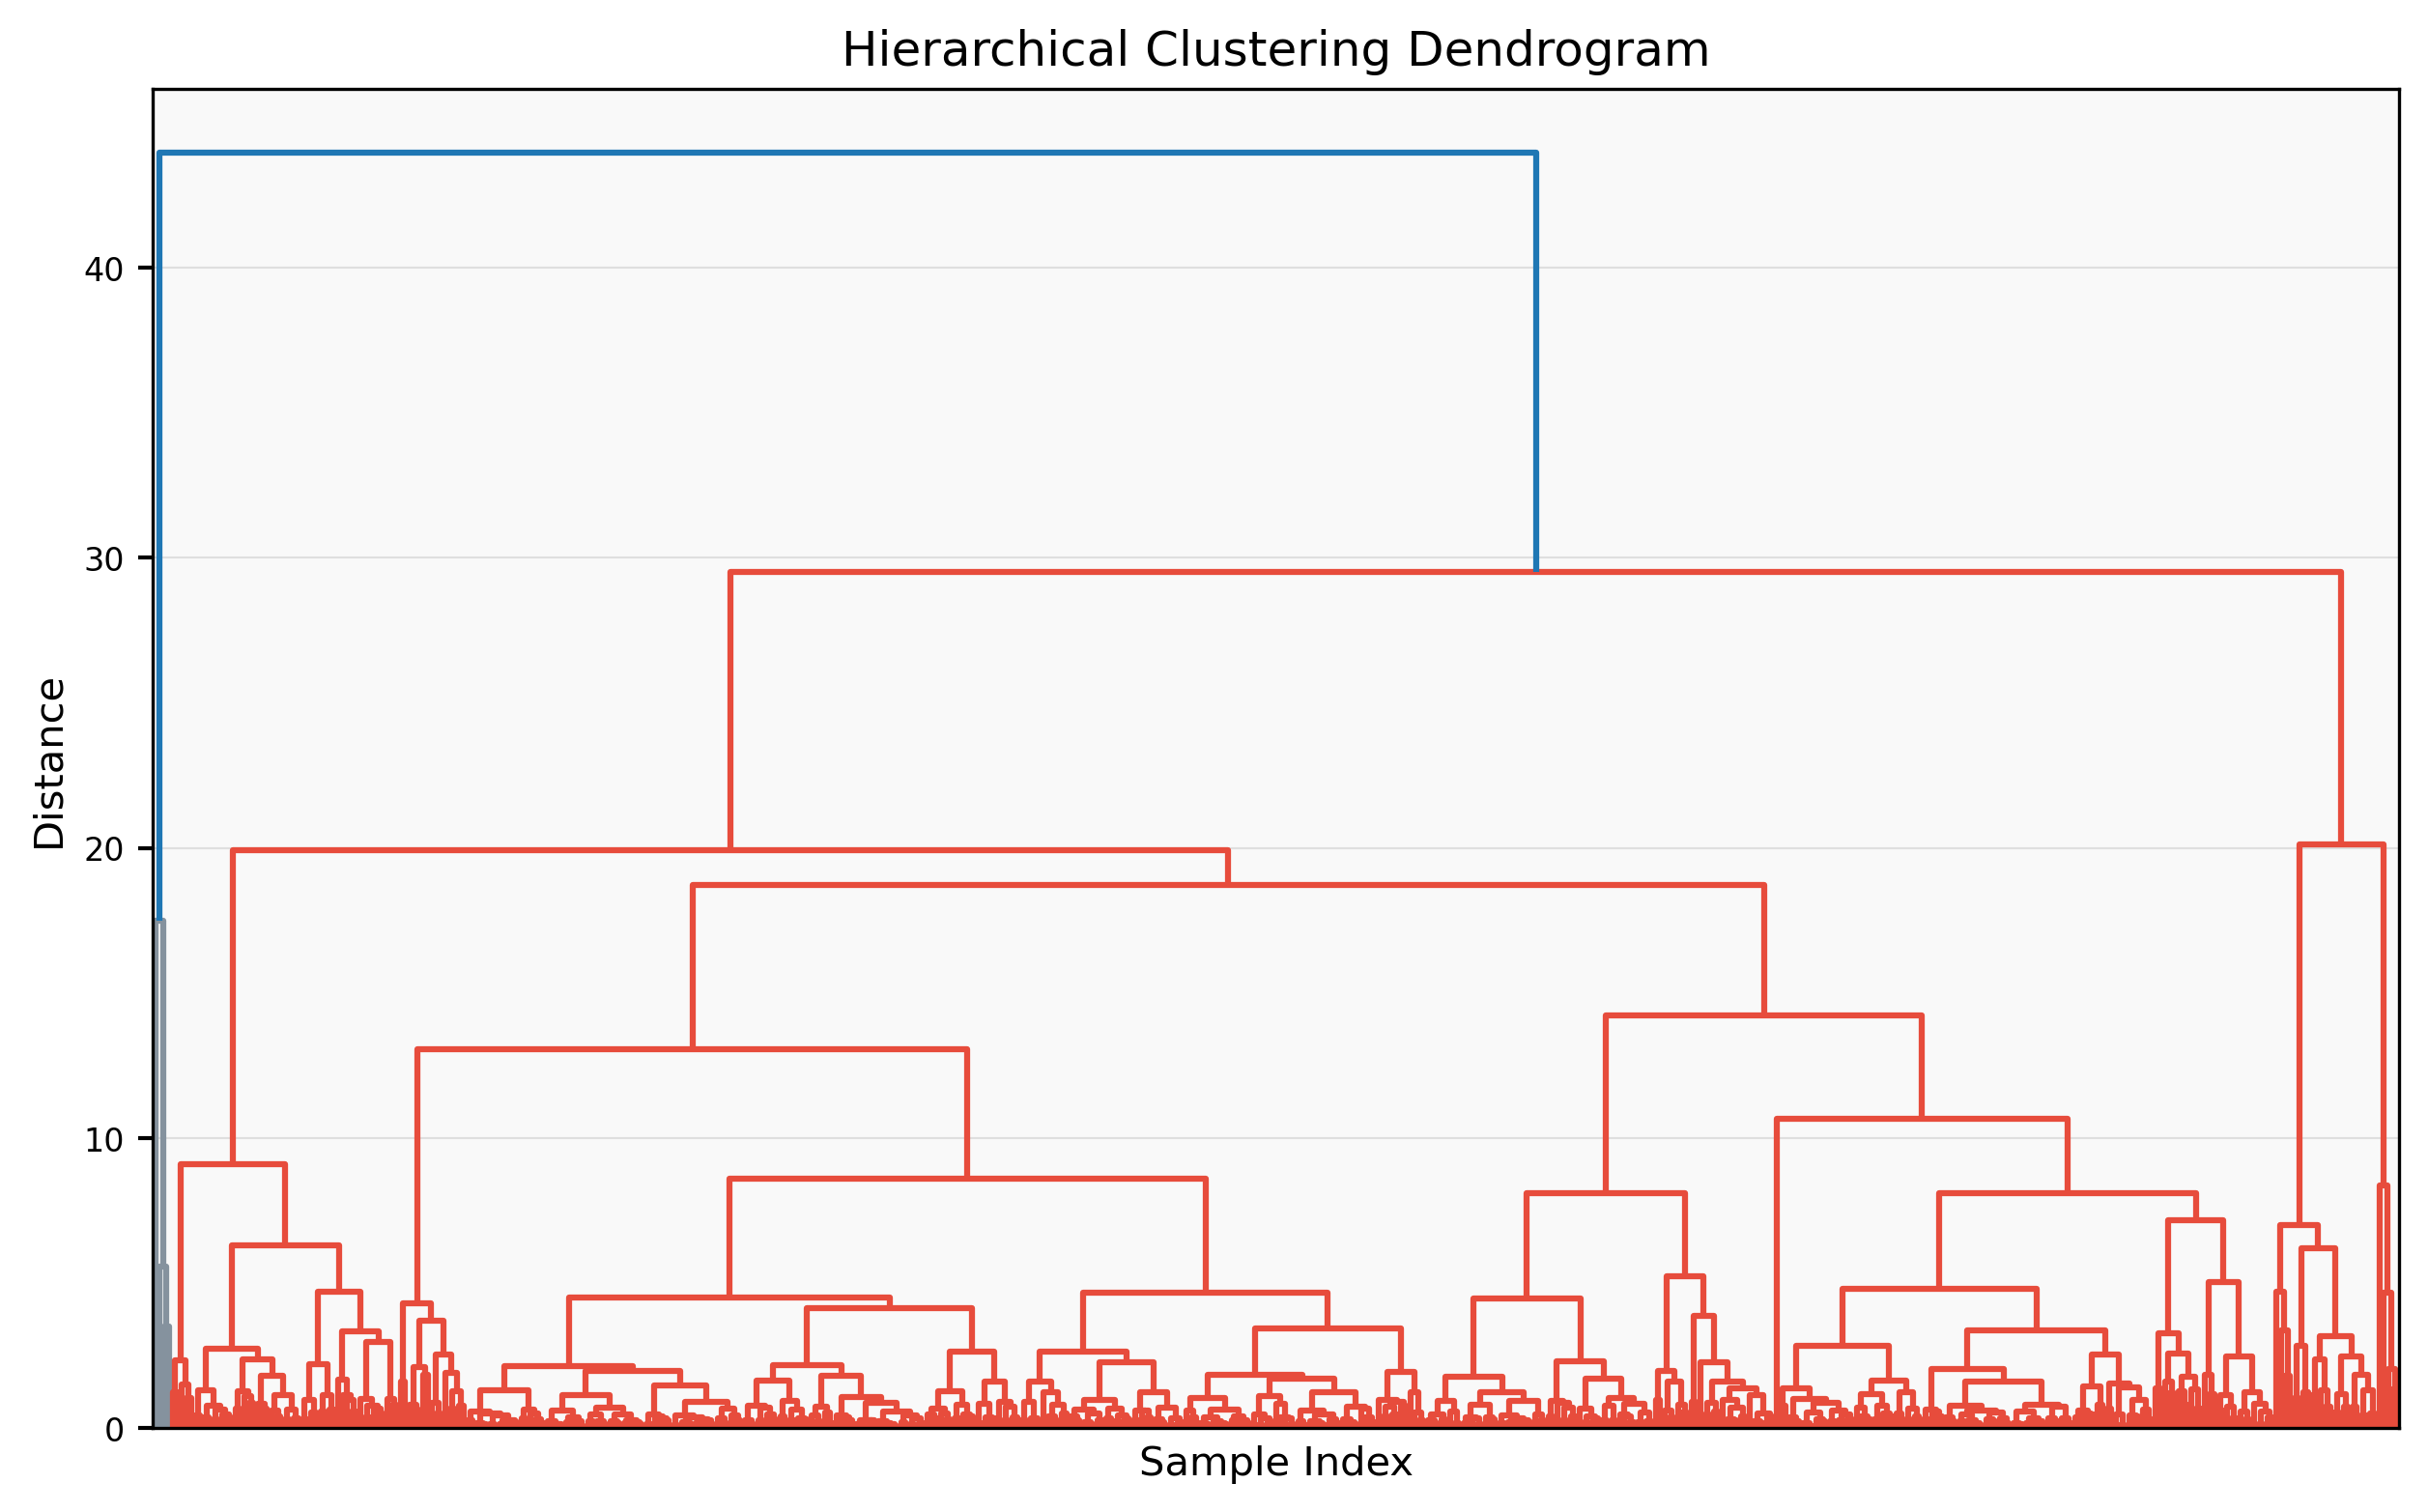

In [38]:
from scipy.cluster import hierarchy
cluster_colors = ['#85929E','#E74C3C','#F7DC6F','#DC7633']
Z = linkage(X_scaled, 'ward')

hierarchy.set_link_color_palette(cluster_colors)
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
dendrogram(Z, no_labels=True)
ax.set_facecolor('#F9F9F9')
ax.grid(True, color='#DFDFDF', linewidth=0.5, zorder = 1)
ax.tick_params(axis='x', width=1)
ax.tick_params(axis='y', width=1)
ax.tick_params(axis='both', colors='black', labelsize=8)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

The hierarchical clustering dendrogram depicted in Figure 5 provides a detailed visualization of the sequential agglomeration process, whereby individual securities are progressively grouped into increasingly larger clusters. This grouping is predicated on the measured similarities between the securities. A thorough examination of the entire dendrogram, particularly focusing on the pattern of linkage and the distances at which clusters merge, reveals that selecting 4 as the optimal number of clusters is justified for the average linkage method used in this analysis.

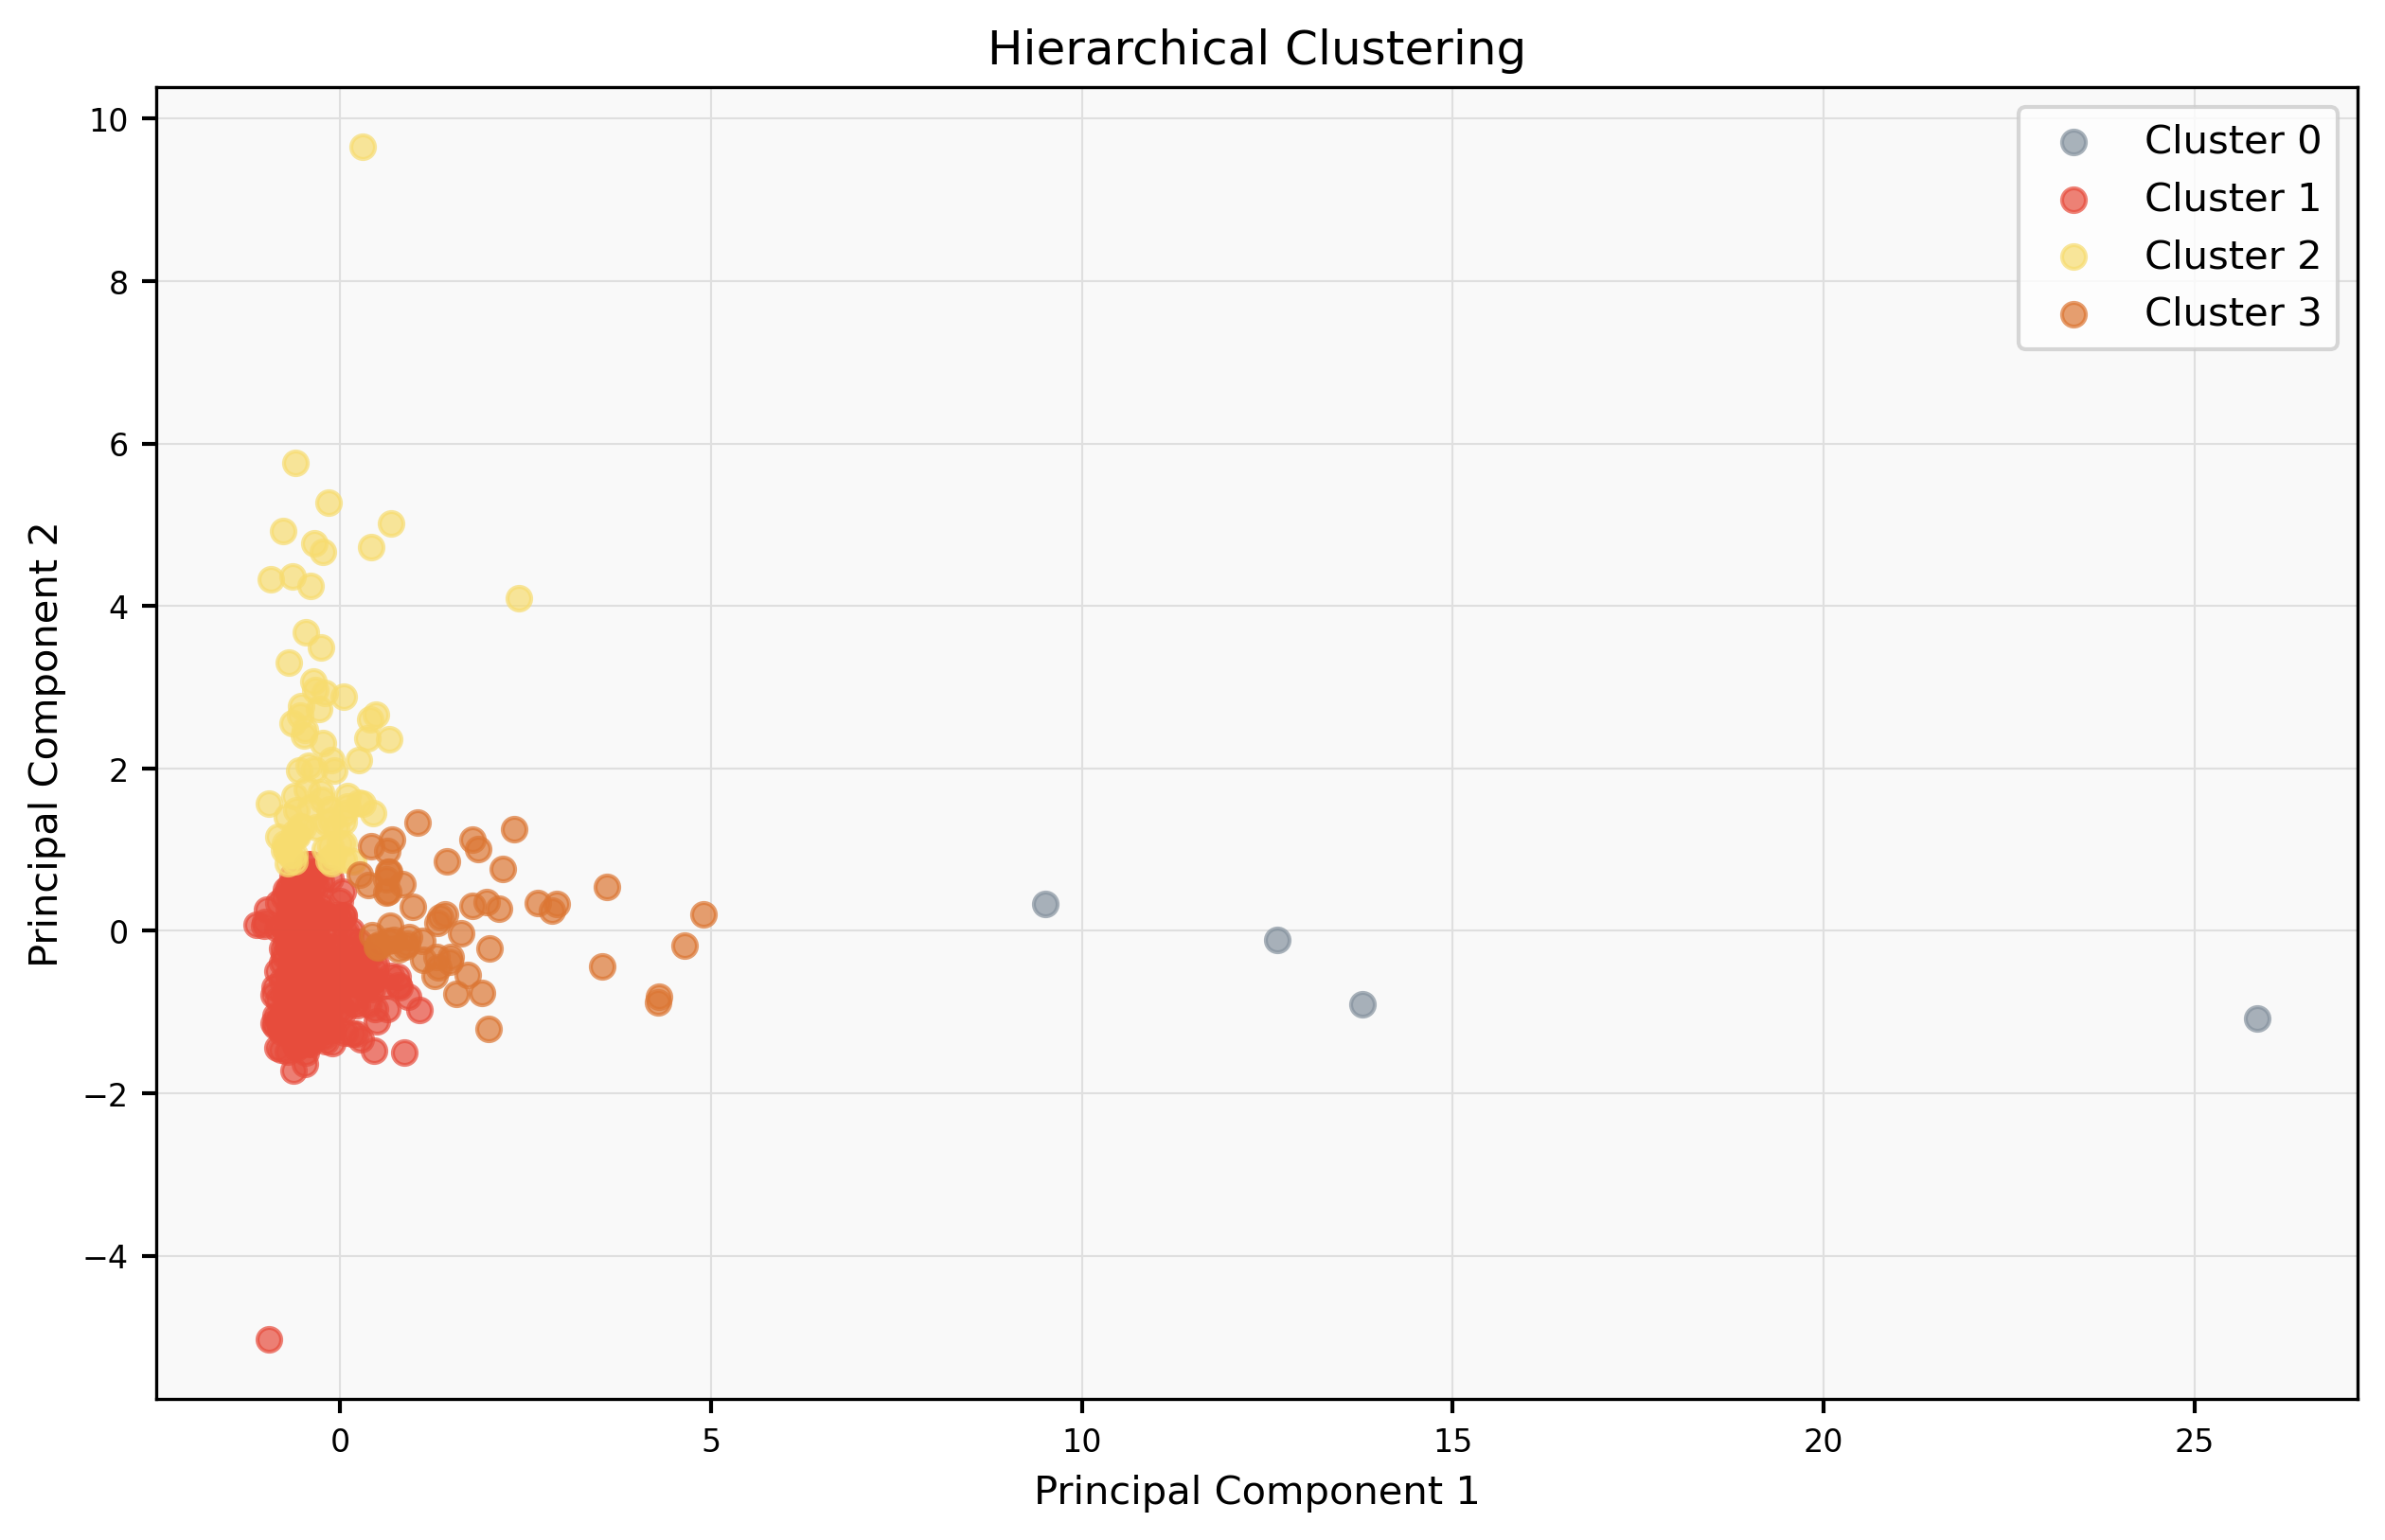

In [23]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
colors = ['#85929E','#E74C3C','#F7DC6F','#DC7633']

for i in range(np.max(hclust_labels) + 1):
    plt.scatter(X_pca[hclust_labels == i, 0], X_pca[hclust_labels == i, 1], 
                color=colors[i % len(colors)], 
                label=f'Cluster {i}', 
                alpha=0.7,
                zorder = 2)

ax.set_facecolor('#F9F9F9')
ax.grid(True, color='#DFDFDF', linewidth=0.5, zorder = 1)
ax.tick_params(axis='x', width=1)
ax.tick_params(axis='y', width=1)
ax.tick_params(axis='both', colors='black', labelsize=8)

plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

The outcome of hierarchical clustering demonstrates a remarkable concordance with the results previously derived from K-means clustering. This parallel between the two distinct clustering methodologies is crucial, as it underscores a consistent pattern within the dataset concerning the grouping of securities based on their inherent characteristics and behaviors. Such consistency across different analytical approaches not only validates the robustness of the clustering results but also reinforces the notion that the identified clusters reflect meaningful divisions within the securities data.

In [24]:
features_df_scaled['Composite Score'] = features_df_scaled['Trend Slope'] / features_df_scaled['Avg Volatility']

In [25]:
top_performers_overall = features_df_scaled.sort_values('Composite Score', ascending=False).head(4)

top_performers_overall[['Ticker', 'Cluster', 'Composite Score']]

,Ticker,Cluster,Composite Score
463,USB,0,98.923732
413,SNPS,3,60.960966
308,MLM,3,57.941844
344,NVR,1,51.627105


Table above indicates that after successfully grouping securities into clusters using clustering techniques, a composite score was introduced as a metric to pinpoint the current best-performing securities within the dataset. Upon applying composite scores across the clustered securities, four standout performers emerged -  U.S. Bancorp (USB) with the highest composite score (98.92), Synopsys Inc. (SNPS) with 60.96, Martin Marietta Materials, Inc. (MLM) with 57.94, and NVR, Inc. (NVR) with 51.63. In addition, Figure 7 shows the security movement from 2020 up to current date.

# TIME SERIES ANALYSIS

After conducting cluster analysis and identifying distinct behaviors and trends among securities, a subset of these securities will be selected for further investigation through time series analysis, specifically employing Long Short-Term Memory (LSTM) networks. LSTM, a type of recurrent neural network (RNN) architecture, is particularly well-suited for modeling and forecasting time series data due to its ability to capture long-term dependencies. By applying LSTM to stock market, it can uncover more about their movements, potential future behavior, and volatility. The securities chosen for LSTM analysis will typically be those that through cluster analysis, have been identified as having unique characteristics, strong performance trends, and notable stability. 

In [26]:
tsa_df = df[df['Ticker'].isin(['USB', 'SNPS', 'MLM', 'NVR'])].reset_index(drop=True)
tsa_df = tsa_df[['Ticker'] + [c for c in tsa_df.columns if c != 'Ticker']]
tsa_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Price Change,Next Day Open
0,MLM,2020-01-02,281.720001,281.820007,275.540009,276.609985,268.394775,553500,2.229163,-0.708576,274.649994
1,MLM,2020-01-03,274.649994,279.450012,274.649994,275.790009,267.599182,442400,1.747686,0.395227,276.880005
2,MLM,2020-01-06,276.880005,278.089996,275.739990,276.640015,268.423889,571500,0.848745,-0.281965,275.859985
3,MLM,2020-01-07,275.859985,279.549988,274.760010,276.019989,267.822296,533700,1.736380,0.094200,276.279999
4,MLM,2020-01-08,276.279999,279.160004,273.929993,276.959991,268.734344,506500,1.893011,0.292460,277.769989
...,...,...,...,...,...,...,...,...,...,...,...
4131,USB,2024-02-05,40.439999,40.490002,39.919998,40.099998,40.099998,8880300,1.409504,-0.124686,40.049999
4132,USB,2024-02-06,40.049999,40.509998,39.919998,40.099998,40.099998,8728400,1.473159,0.349135,40.240002
4133,USB,2024-02-07,40.240002,40.320000,38.869999,39.910000,39.910000,12255300,3.603381,-0.526182,39.700001
4134,USB,2024-02-08,39.700001,40.419998,39.389999,40.369999,40.369999,7601600,2.594455,-0.173395,40.299999


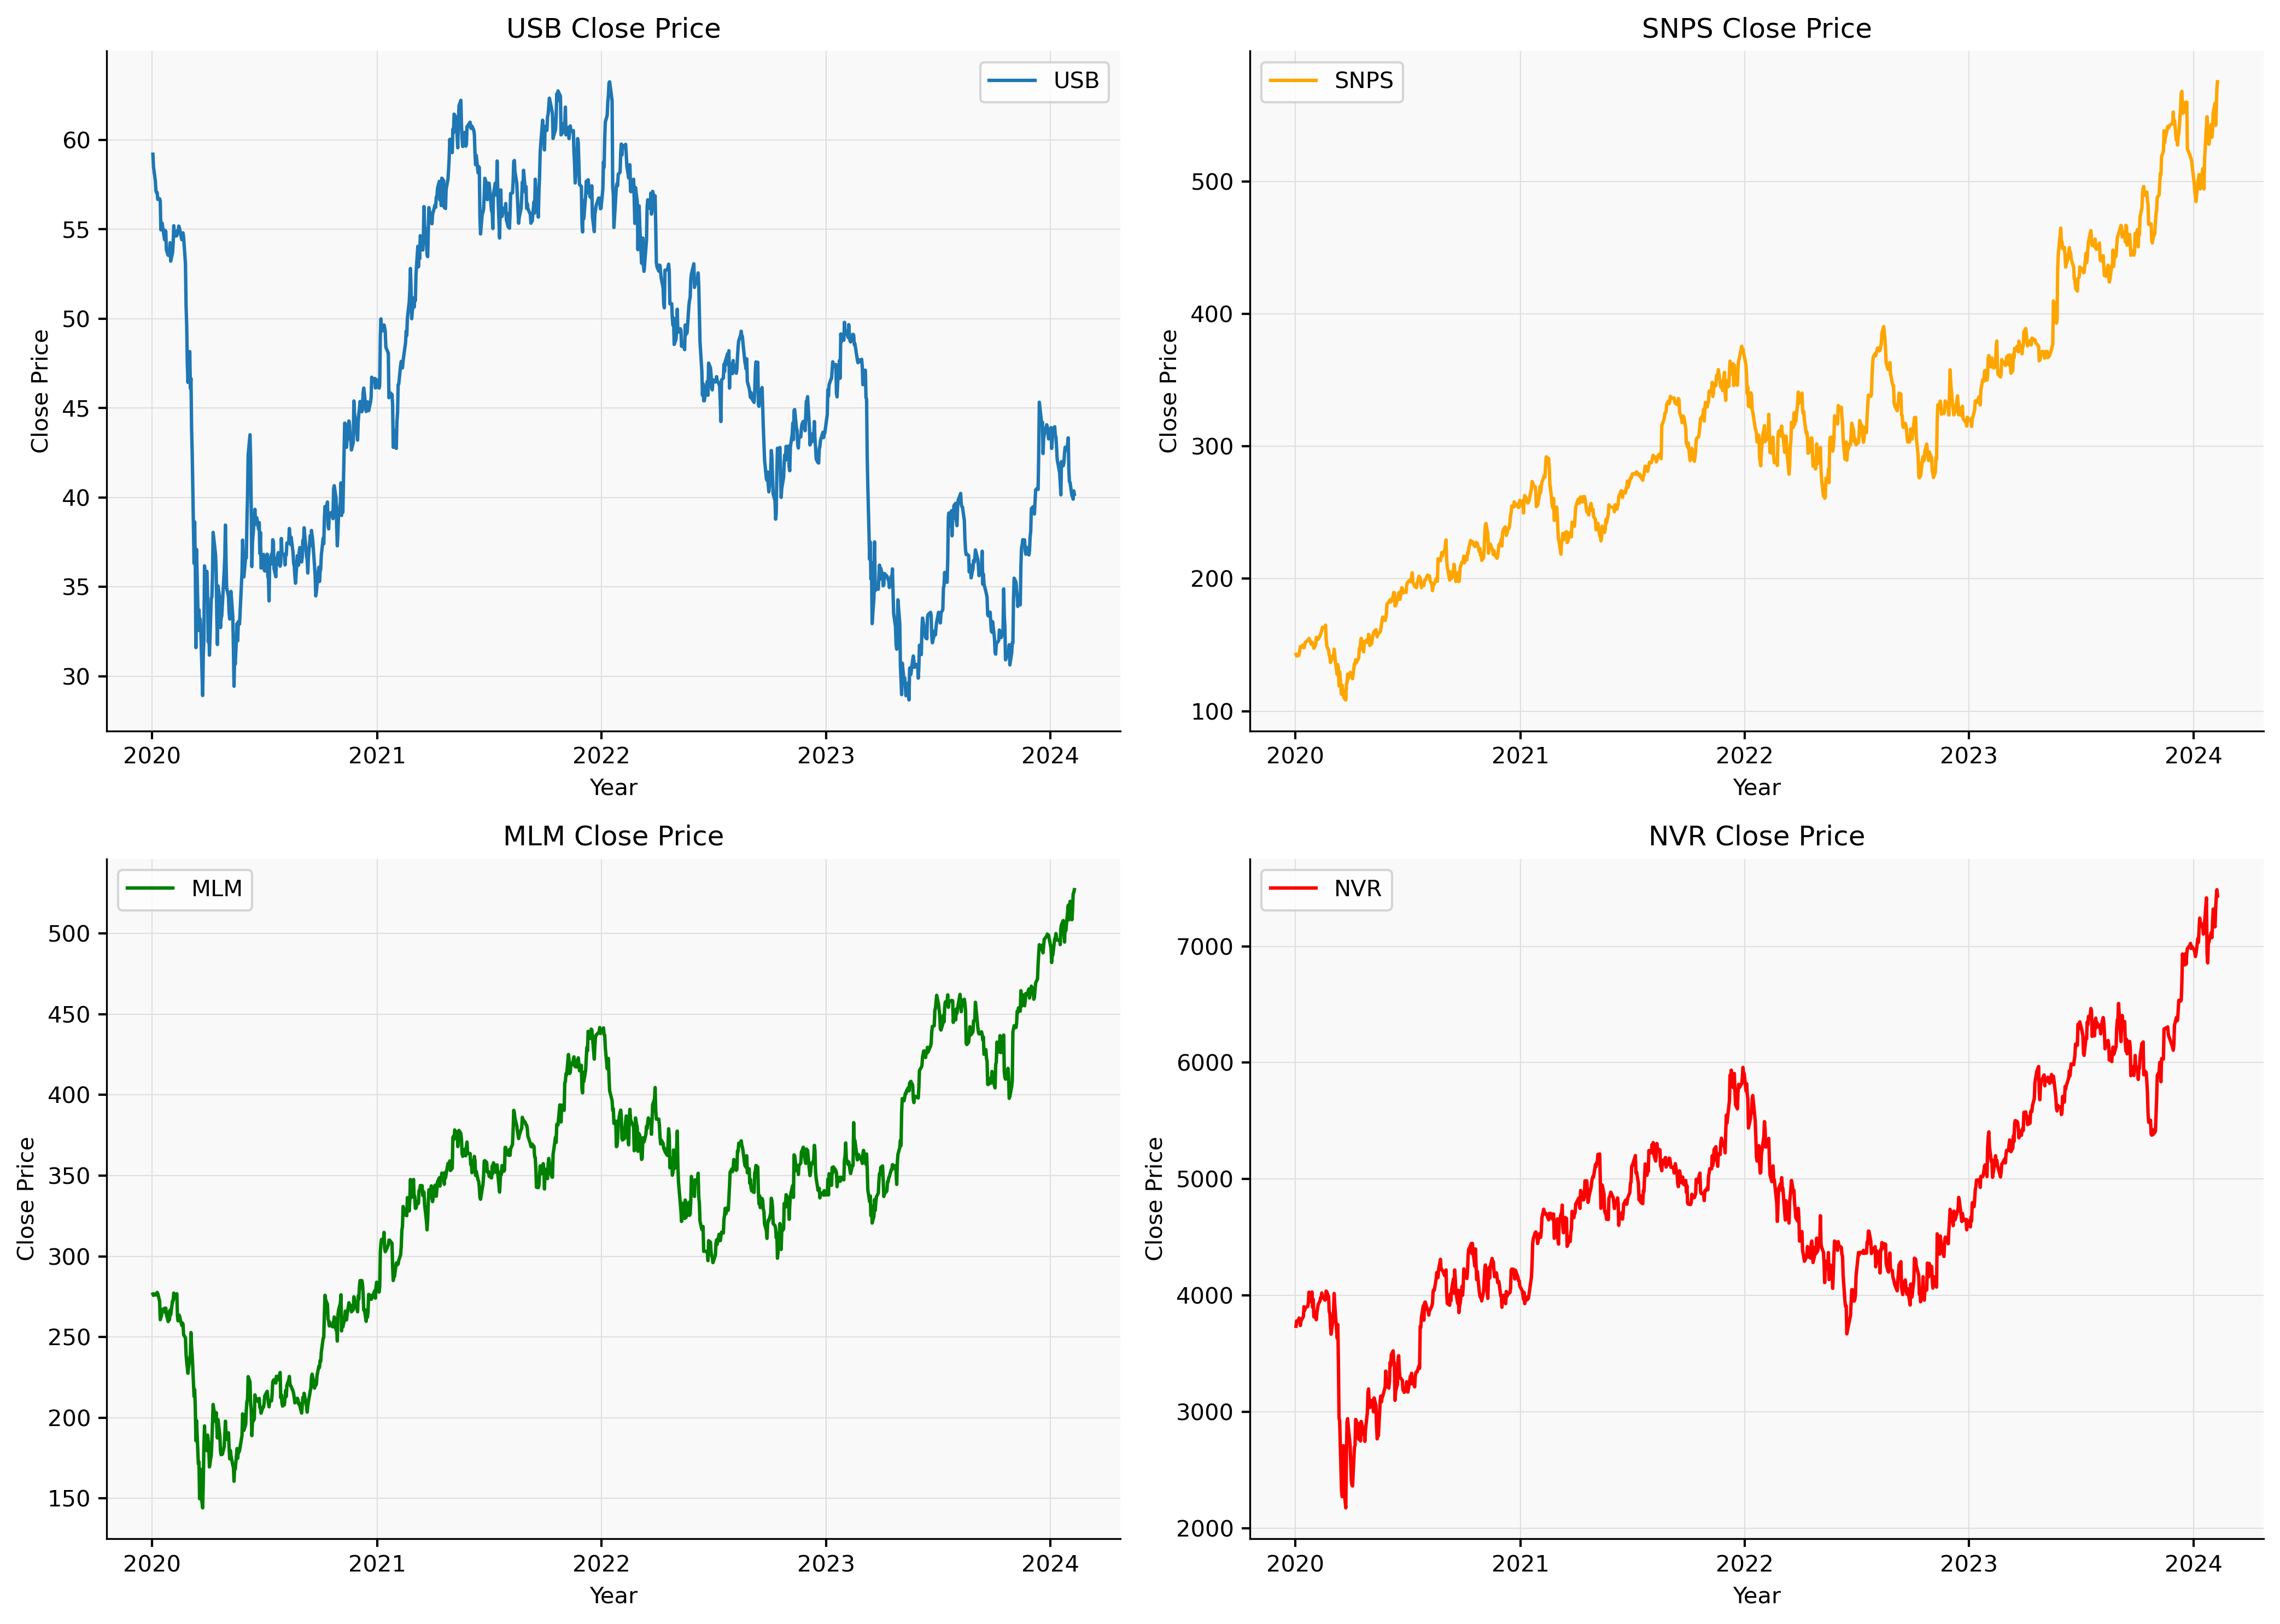

In [27]:
usb_df = tsa_df[tsa_df['Ticker'] == 'USB']
snps_df = tsa_df[tsa_df['Ticker'] == 'SNPS']
mlm_df = tsa_df[tsa_df['Ticker'] == 'MLM']
nvr_df = tsa_df[tsa_df['Ticker'] == 'NVR']

fig, axs = plt.subplots(2, 2, figsize=(14, 10), dpi = 300)

axs[0, 0].plot(usb_df['Date'], usb_df['Close'], label='USB')
axs[0, 0].set_title('USB Close Price')
axs[0, 0].xaxis.set_major_locator(mdates.YearLocator())
axs[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[0, 0].legend()

axs[0, 1].plot(snps_df['Date'], snps_df['Close'], label='SNPS', color='orange')
axs[0, 1].set_title('SNPS Close Price')
axs[0, 1].xaxis.set_major_locator(mdates.YearLocator())
axs[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[0, 1].legend()

axs[1, 0].plot(mlm_df['Date'], mlm_df['Close'], label='MLM', color='green')
axs[1, 0].set_title('MLM Close Price')
axs[1, 0].xaxis.set_major_locator(mdates.YearLocator())
axs[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[1, 0].legend()

axs[1, 1].plot(nvr_df['Date'], nvr_df['Close'], label='NVR', color='red')
axs[1, 1].set_title('NVR Close Price')
axs[1, 1].xaxis.set_major_locator(mdates.YearLocator())
axs[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[1, 1].legend()

for ax in axs.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(0)
    sns.despine(top=True, right=True, left=False, bottom=False)
    ax.set_xlabel('Year')
    ax.set_ylabel('Close Price')
    ax.set_facecolor('#F9F9F9')
    ax.grid(True, color='#DFDFDF', linewidth=0.5)
    ax.tick_params(axis='x', width=1)
    ax.tick_params(axis='y', width=1)

plt.tight_layout()
plt.show()

## Data Preprocessing

In [28]:
close_prices = tsa_df['Close'].values.reshape(-1, 1)  
scaler = MinMaxScaler(feature_range=(0, 1))
close_scaled = scaler.fit_transform(close_prices)

tsa_df['Close Scaled'] = close_scaled

## Long Short-Term Memory (LSTM)

In [29]:
tsa_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Price Change,Next Day Open,Close Scaled
0,MLM,2020-01-02,281.720001,281.820007,275.540009,276.609985,268.394775,553500,2.229163,-0.708576,274.649994,0.033243
1,MLM,2020-01-03,274.649994,279.450012,274.649994,275.790009,267.599182,442400,1.747686,0.395227,276.880005,0.033134
2,MLM,2020-01-06,276.880005,278.089996,275.739990,276.640015,268.423889,571500,0.848745,-0.281965,275.859985,0.033247
3,MLM,2020-01-07,275.859985,279.549988,274.760010,276.019989,267.822296,533700,1.736380,0.094200,276.279999,0.033164
4,MLM,2020-01-08,276.279999,279.160004,273.929993,276.959991,268.734344,506500,1.893011,0.292460,277.769989,0.033290
...,...,...,...,...,...,...,...,...,...,...,...,...
4131,USB,2024-02-05,40.439999,40.490002,39.919998,40.099998,40.099998,8880300,1.409504,-0.124686,40.049999,0.001531
4132,USB,2024-02-06,40.049999,40.509998,39.919998,40.099998,40.099998,8728400,1.473159,0.349135,40.240002,0.001531
4133,USB,2024-02-07,40.240002,40.320000,38.869999,39.910000,39.910000,12255300,3.603381,-0.526182,39.700001,0.001506
4134,USB,2024-02-08,39.700001,40.419998,39.389999,40.369999,40.369999,7601600,2.594455,-0.173395,40.299999,0.001567


### Data Preparation

In [30]:
usb_df = tsa_df[tsa_df['Ticker'] == 'USB'][['Date', 'Close']]

scaler = MinMaxScaler(feature_range=(0, 1))
usb_df['Close'] = scaler.fit_transform(usb_df[['Close']])

In [31]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

n_steps = 60
X, y = create_sequences(usb_df[['Close']].values, n_steps)
X = X.reshape(X.shape[0], X.shape[1], 1)

### Building the LSTM Model

In [32]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

### Training LSTM Model

In [33]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100

25/25 [==============================] - 5s 29ms/step - loss: 0.0826
Epoch 2/100
25/25 [==============================] - 1s 28ms/step - loss: 0.0116
Epoch 3/100
25/25 [==============================] - 1s 28ms/step - loss: 0.0094
Epoch 4/100
25/25 [==============================] - 1s 29ms/step - loss: 0.0076
Epoch 5/100
25/25 [==============================] - 1s 29ms/step - loss: 0.0067
Epoch 6/100
25/25 [==============================] - 1s 28ms/step - loss: 0.0064
Epoch 7/100
25/25 [==============================] - 1s 29ms/step - loss: 0.0069
Epoch 8/100
25/25 [==============================] - 1s 28ms/step - loss: 0.0061
Epoch 9/100
25/25 [==============================] - 1s 28ms/step - loss: 0.0060
Epoch 10/100
25/25 [==============================] - 1s 28ms/step - loss: 0.0063
Epoch 11/100
25/25 [==============================] - 1s 29ms/step - loss: 0.0065
Epoch 12/100
25/25 [==============================] - 1s 29ms/step - loss: 0.0058
Epoch 13/100
25/25 [====

25/25 [==============================] - 1s 29ms/step - loss: 0.0027
Epoch 99/100
25/25 [==============================] - 1s 30ms/step - loss: 0.0027
Epoch 100/100
25/25 [==============================] - 1s 33ms/step - loss: 0.0027


### LSTM Model Prediction

7/7 [==============================] - 1s 11ms/step


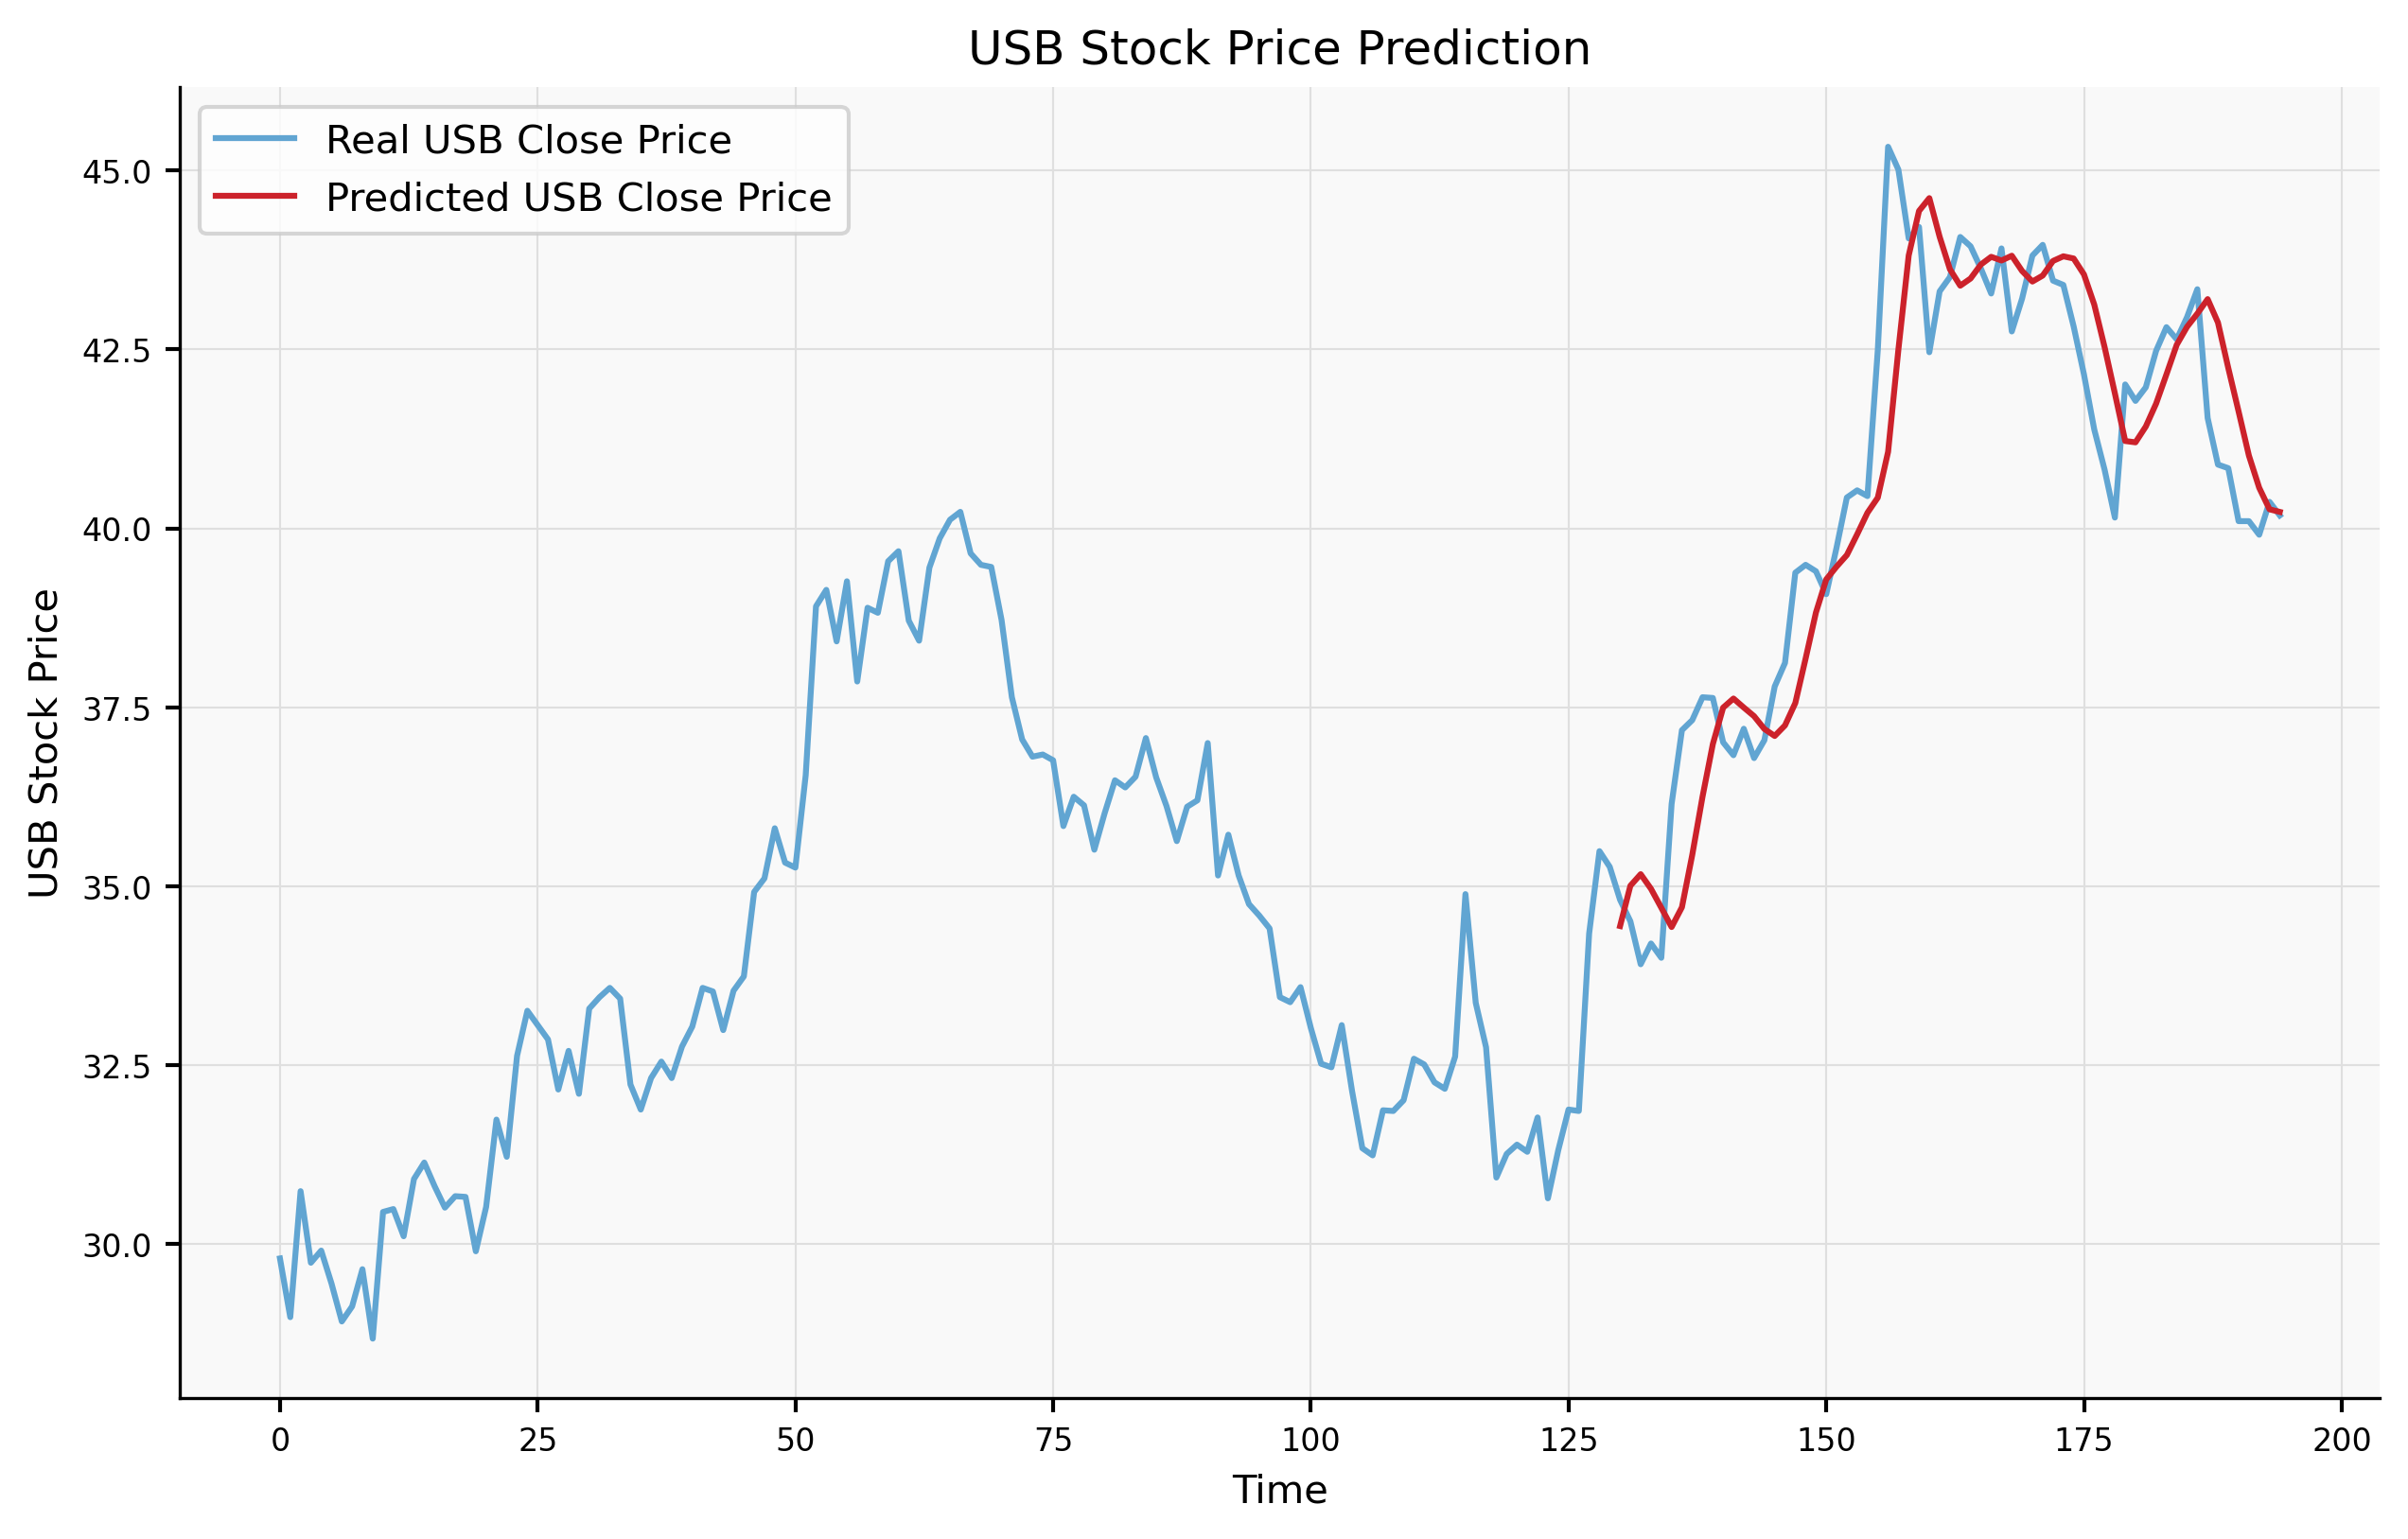

In [35]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.plot(real_prices, color='#61a5d2', label='Real USB Close Price')
plt.plot(range(130, len(predicted_prices)), predicted_prices[130:], color='#cc222b', label='Predicted USB Close Price')

plt.title('USB Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('USB Stock Price')
plt.legend()

ax.grid(True, color='#DFDFDF', linewidth=0.5)
ax.tick_params(axis='x', width=1)
ax.tick_params(axis='y', width=1)
ax.tick_params(axis='both', colors='black', labelsize=8)
ax.set_facecolor('#F9F9F9')

plt.show()

In figure above, the stock price prediction for U.S. Bancorp (USB) were presented. In this figure, the observed data is depicted in blue, providing historical account of USB’s stock price movements over the designated time period. The predicted stock prices are shown in red, representing the outcomes of the LSTM model’s attempt to capture future price movements based on historical trends.

A closer examination of Figure 8 reveals that the predicted line closely mirrors the actual line, effectively capturing USB’s stock price movements. This alignment is particularly evident in periods of significant volatility where both steep rises and sharp declines in the stock price are accurately reflected in the predictions. The model’s ability to replicate these patterns – both the highs and lows – underscores its proficiency in understanding fluctuations.


### Evaluation Metrics

After completing the time series forecasting using Long Short-Term Memory Networks, evaluation is needed to ensure reliability. To accomplish this, several statistical metrics will be employed such as Root Mean Square Error (RMSE), Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), R-squared (R^2), and the Explained Variance Score.

In [36]:
rmse = np.sqrt(mean_squared_error(real_prices, predicted_prices))
mae = mean_absolute_error(real_prices, predicted_prices)
mape = np.mean(np.abs((real_prices - predicted_prices) / real_prices)) * 100
r_squared = r2_score(real_prices, predicted_prices)
explained_variance = explained_variance_score(real_prices, predicted_prices)

In [37]:
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('Mean Absolute Percentage Error:', mape, '%')
print('R-squared:', r_squared)
print('Explained Variance Score:', explained_variance)

Root Mean Squared Error: 1.0896884009719423
Mean Absolute Error: 0.8315461965707631
Mean Absolute Percentage Error: 2.3162031243697725 %
R-squared: 0.9361141377646384
Explained Variance Score: 0.9363758054706817


This presents the performance metrics of the Long Short-Term Memory Model for the USB stock price prediction model. An RMSE of 1.0897 suggests that the model’s predictions deviate from the actual prices by approximately 1.0897 units. An MAE of 0.8315 implies that the model’s predictions are 0.8315 units away. A MAPE of 2.3162% shows that the model is off by approximately 2%. An R2 of 0.9361 states that the variance in the stock price can be explained by the model. Overall, the metrics presented in Table 2 demonstrate the high degree of accuracy and predictive capability of a model, with low error rates and high explanatory power.

### Discussion

<div style="text-align: justify"> The comprehensive analysis in the study employed both clustering and time series forecasting techniques to dissect and predict the performance of securities, specifically focusing on the S&P 500 companies. The multifaceted approach enables to identify inherent grouping within the market based on the security characteristics and behaviors. Utilizing both K-means and hierarchical clustering methodologies provided a robust framework for identifying similarities and differences in the performance and risk profile of these companies. The K-means clustering results supported by hierarchical clustering outcomes suggested an optimal partitioning into four distinct clusters. This convergence of finding across methodologies not only validated the cluster structures identified but also highlighted the presence of intrinsic patterns within the dataset. </div><br>

<div style="text-align: justify"> For investors, the clustering results are invaluable. They offer a strategic framework for portfolio diversification by classifying securities into groups with shared risk and performance profiles. Specifically identifying clusters of stable and high-performing securities are crucial for investors aiming for sustainable growth with manageable risk levels. Moreover, the selection of securities for an in-depth time series analysis is also vital. Employing Long Short-Term Memory (LSTM) networks to forecast their future stock price movements was strategic. The integration of time series analysis following the clustering phase is a critical step for conducting a deeper analysis of selected securities. It allows investors to go beyond the static characteristics identified during clustering and understand the dynamic aspects of securities' performance over time. Moreover, this methodology also supports the construction of a diversified portfolio, harmonizing growth objectives with risk management imperatives. </div><br>

<div style="text-align: justify"> However, while this approach offers significant insights, it is not without its areas for improvement and inherent limitations. For instance, the effectiveness of clustering and time series analysis can be contingent upon the quality and completeness of the data used. Inaccuracies or gaps in data can lead to misleading analyses and predictions. Furthermore, the dynamic nature of financial markets means that models based on historical data may not always capture future market movements accurately, especially in the face of unforeseen events or shifts in market sentiment. Additionally, the selection of parameters for both clustering and LSTM models requires a delicate balance between model complexity and interpretability, with overly complex models risking overfitting and simpler models potentially under capturing the nuances of market dynamics.</div><br>

<div style="text-align: justify"> Recommendations for future studies include the integration of alternative data sources to enrich the analysis and potentially unveil novel insights into securities' behaviors. Exploring different clustering algorithms and time series models could also yield improvements in segmentation and prediction accuracy. Moreover, incorporating macroeconomic indicators and sentiment analysis could enhance the models' ability to anticipate market shifts driven by external factors. Lastly, continuous validation of the models against new data and refining them based on evolving market conditions will be crucial for maintaining their relevance and accuracy over time. </div>


***
Disclaimer: The author of this study is not a licensed financial analyst, investment advisor, or broker-dealer. The analysis presented herein is provided for informational and educational purposes only and should not be construed as investment advice. The strategies and methodologies discussed in this paper are based on data-driven research